## Avocado Project

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv(r'D:\Files\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


This data frame contains information related to **Avocado**. It contains **18249 rows and 14 columns** out of which **12 columns are inputs** and **2 columns are target variable** i.e. **'region' and 'AveragePrice' column**.  
The data frame contains both  **numeric and catagorical data.**  
We are going to treat **'AveragePrice' as Target variable** and **rest of the columns as inputs.**  
**'AveragePrice' column has numeric data,** thus it represents **Regression Problem**.  
***The goal is to predict average price.***   

In [3]:
#Checking data type of columns
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are **three types** of data present in this data frame which are **int64, object and float64**. **'Date' feature** contains date thus it's data type should be **'datetime64'** instead of 'object'.

In [4]:
#checking for whitespace characters in columns of data frame
col=df.columns.tolist() #Storing columns name as list in 'col' variable

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable

for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df.loc[df[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [5]:
df.isnull().sum() #Checking if null values are present in data frame 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

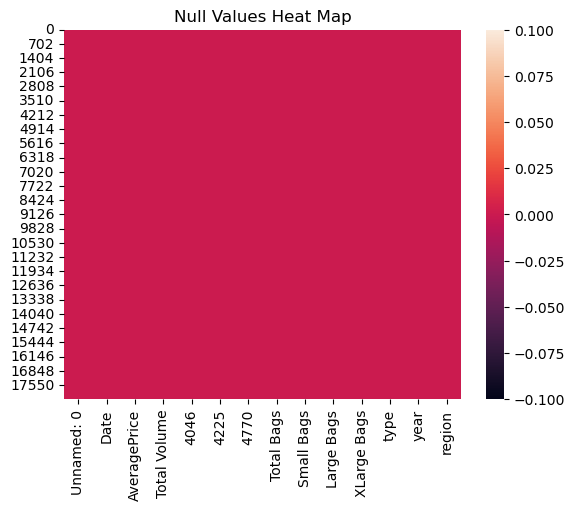

In [6]:
sb.heatmap(df.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm that this **data frame does not have null values present in it.**

In [7]:
#creating a function named 'dup' to check for duplicates values in data frame

def dup(x):#takes one argument i.e variable which stores data frame
    
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable
    
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    
    else:
        print(f'Total duplicates values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(df)

This data frame does not contains duplicate values.


In [8]:
#changing data type of 'Date' feature
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Now the data frame has **4 data types** which are **int64, datetime64[ns], float64 and object**. 'Date' feature's data type is changed from 'object' **to 'datetime64[ns]' successfully.**

In [9]:
df.info()#Checking more information related to data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


This shows **information** related to the **columns** and about their **Non-null count** and **Dtype.** It also shows the memory usage , which is **1.9+ MB** in this case.

In [10]:
#fetching details of columns, such as Unique values, Number of unique values and their value counts 
for i in col:#Iterating through 'col' variable
    print('\n',i,':-\nUnique values:',df[i].unique(),'\nNumber of unique values:',df[i].nunique(),'\n\n',df[i].value_counts().to_frame('Value Counts'))#Printing


 Unnamed: 0 :-
Unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52] 
Number of unique values: 53 

     Value Counts
0            432
7            432
1            432
11           432
9            432
8            432
10           432
6            432
5            432
4            432
3            432
2            432
41           324
34           324
35           324
36           324
37           324
38           324
39           324
40           324
47           324
42           324
43           324
44           324
45           324
46           324
32           324
48           324
49           324
50           324
33           324
26           324
31           324
30           324
12           324
13           324
14           324
15           324
16           324
17           324
18           324
19           324
20           324
21           324
22       

This gives a breif information about **unique values, count of unique values and value counts** of each column present in the data frame.  
**Most of the values** present in **'Total Volume', 'Total Bags' and  'Small Bags'** features are **unqiue.**  
**Most of the values** present in **target variable** are **same**.

In [11]:
df.set_index('Date',inplace=True)#setting date as index of the data frame
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


**'Date' feature** is **set as index** successfully. Now data frame has **13 columns** out of which **12 columns are inputs** and **remaing column is target variable.**

In [12]:
df.describe()#Using describe function on data frame

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


This gives the statistical information of the numerical columns. From the above description we can observe the following:   
1)There are no missing values.    
2)Mean is oddly greater than 50% in **'Total Volume', 'Large Bags' and 'XLarge Bags'** features which means that the data **might** be **skewed to the right** in these features.  
3)Mean is oddly less than 50% in **'4046'** feature which means that the data **might** be **skewed to the left** in this feature.   
4)There is huge jump between max and 75% in **'XLarge Bags', 'Small Bags', and '4770'** features which means that there **might** be **outliers present** in these features.

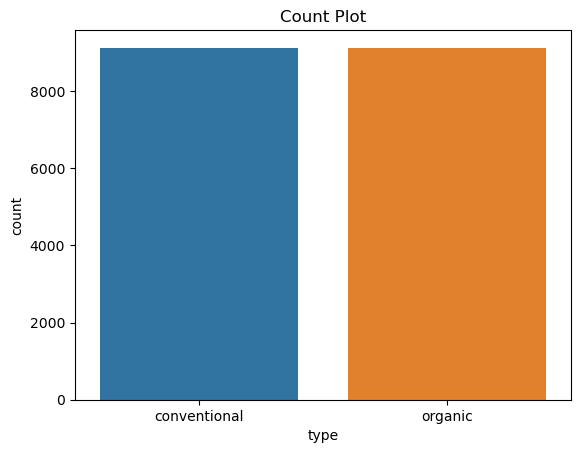

In [13]:
#checking count of values present in 'type' feature
sb.countplot(data=df,x='type')
plt.title('Count Plot')
plt.show()

**'conventional' and 'organic'** values have almost **same count.**

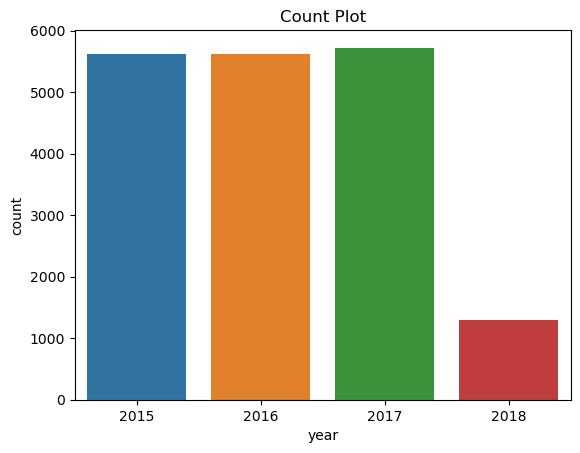

In [14]:
#checking count of values present in 'year' feature
sb.countplot(data=df,x='year')
plt.title('Count Plot')
plt.show()

All years count values are extremely high than the year **'2018'**. Year  **'2017'** is bit high than year **'2015' and '2016'**.

In [15]:
a=df.columns.to_list()#storing columns of data frame in 'a' variable

n_col=[]#creating empty list

for i in a:#iterating through 'a' variable 
    if df[i].dtypes!='object':#using if condition to execute the following code only if the columns contains numeric values
        n_col.append(i)#appending 'i'

n_col.remove('year')#removing year feature as it has catagorical data    

log=[]#creating empty list which is stored in 'log' variable 

def re():#creating a function named 're'
    
    for i in n_col:#iterating through 'col' variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=df,x=log[-1],y=i)
            plt.title('Linear Model Plot')
    plt.show()

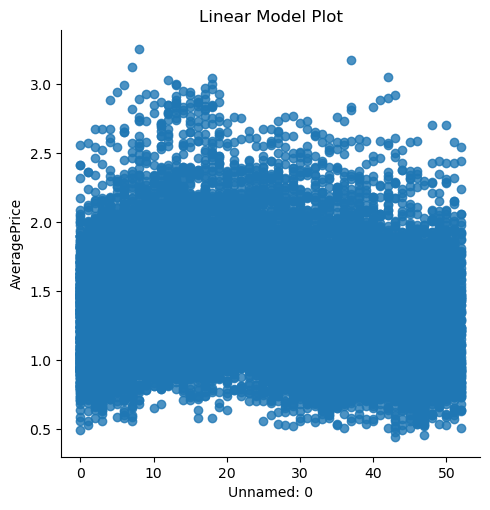

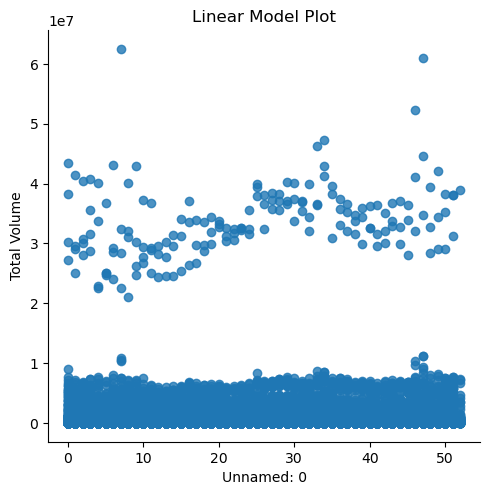

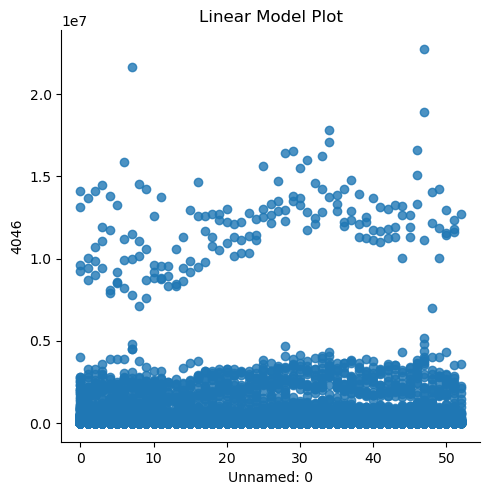

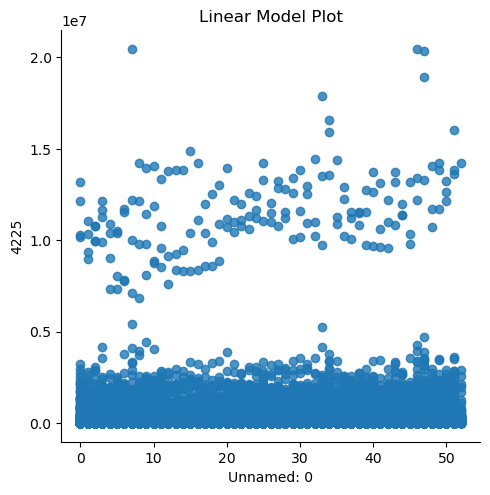

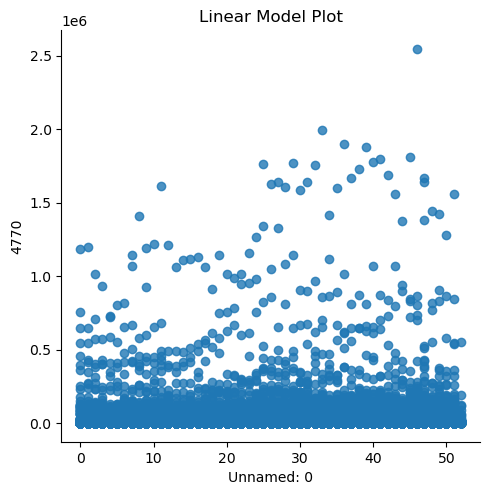

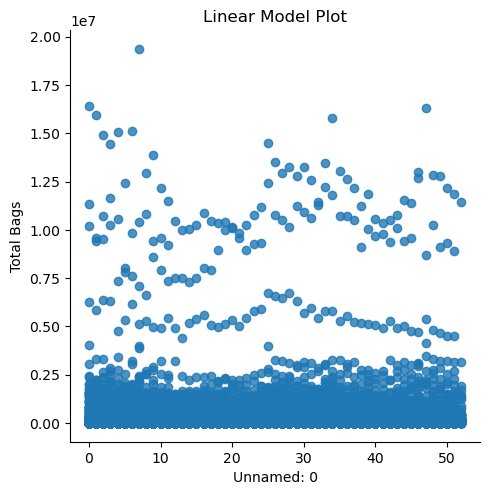

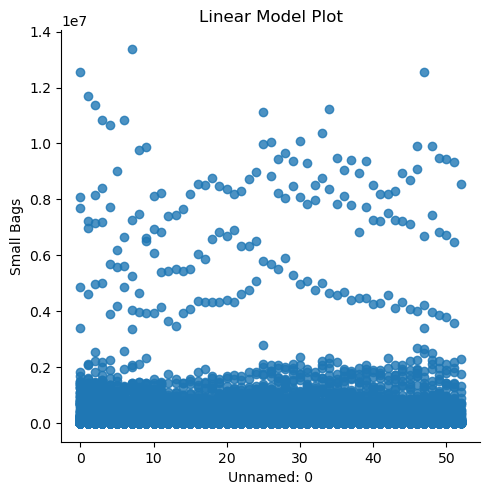

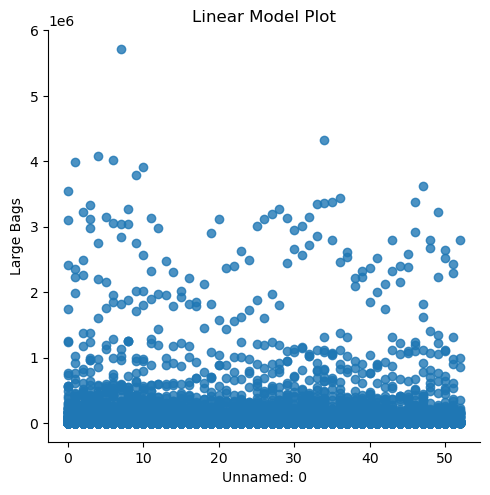

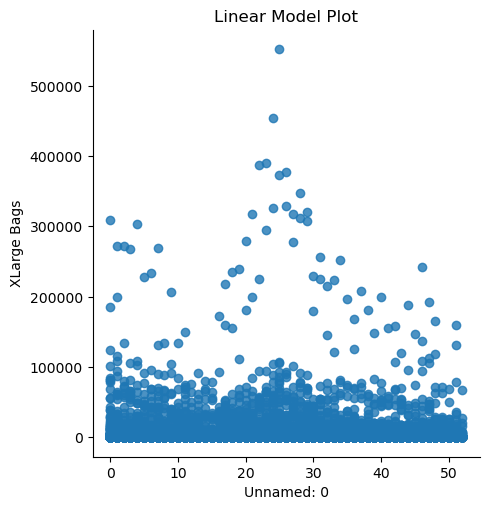

In [16]:
#checking linear relation of 'Unnamed: 0' feature with other features 
log.append('Unnamed: 0')#Appending feature
re()#calling function

'Unnamed: 0' feature's **data points** are roughly concentrated around **0 to 0.5** on **y axis** with other columns.  
Data points of target variable are **concentrated** around **0.5 to 2.0**

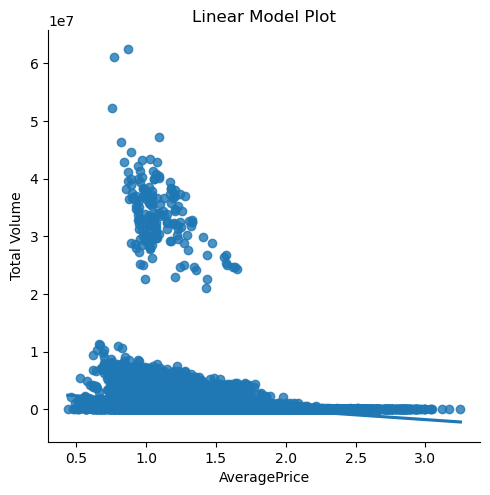

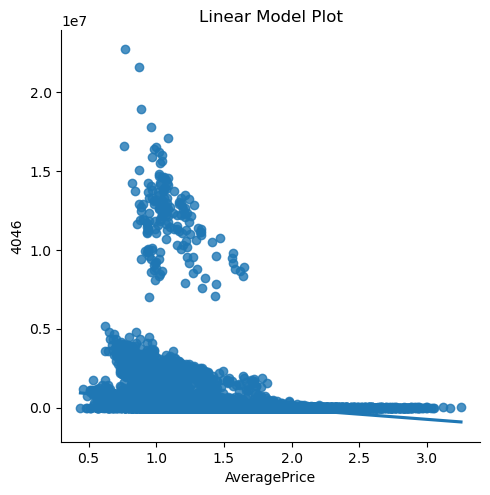

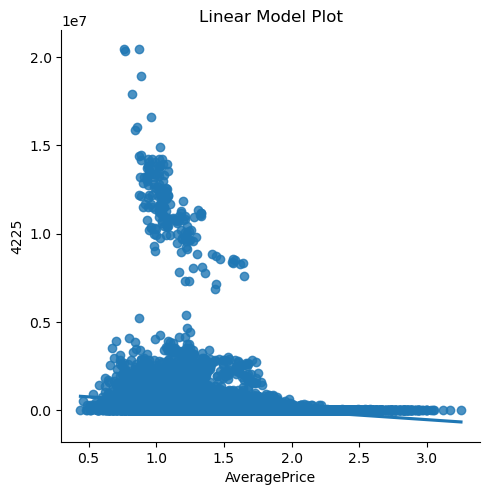

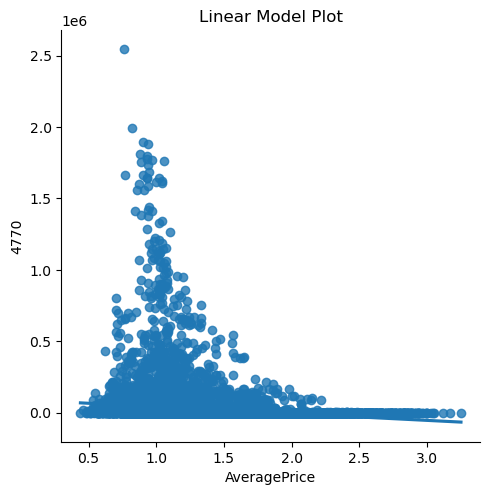

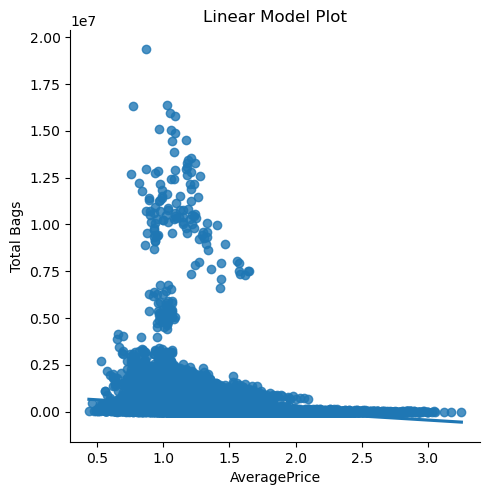

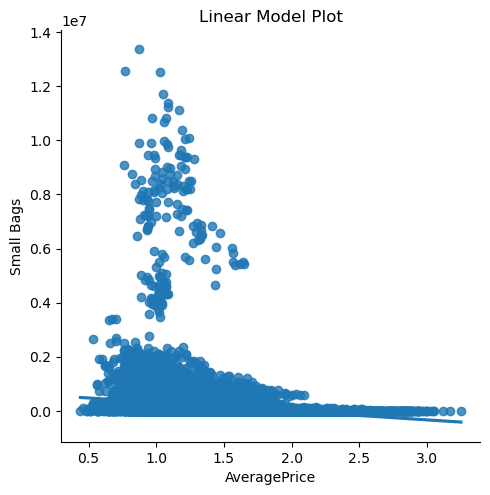

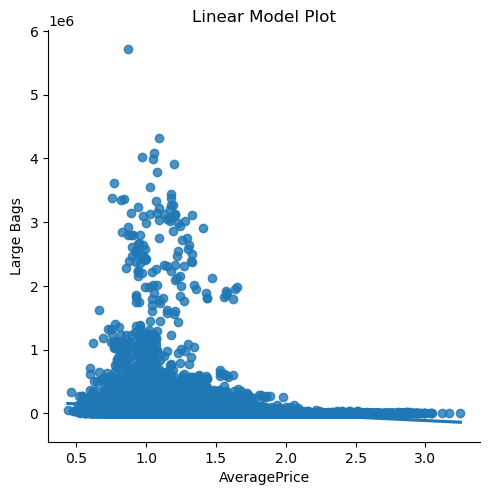

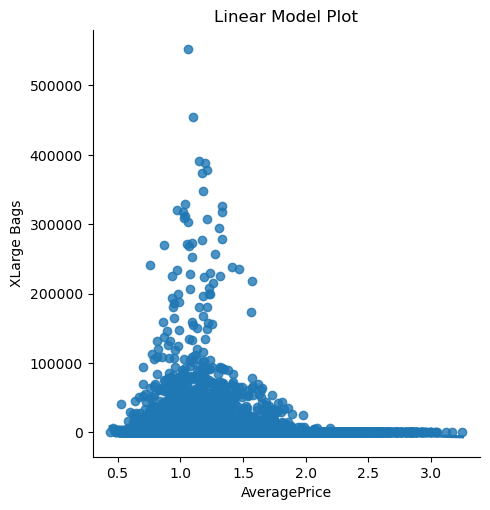

In [17]:
#checking linear relation of 'AveragePrice' with other features 
log.append('AveragePrice')#Appending target variable
re()#calling function

Target variable **has low negative linear relation** with **all of the remaining features.**   
Data points are **concentrated around 0.5 to 2.0** on **x-axis** of all of the remaining features.

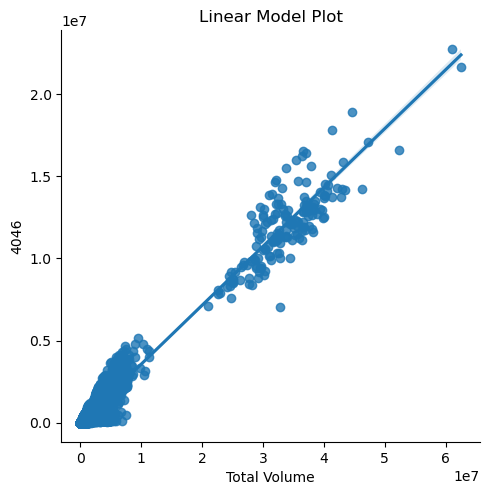

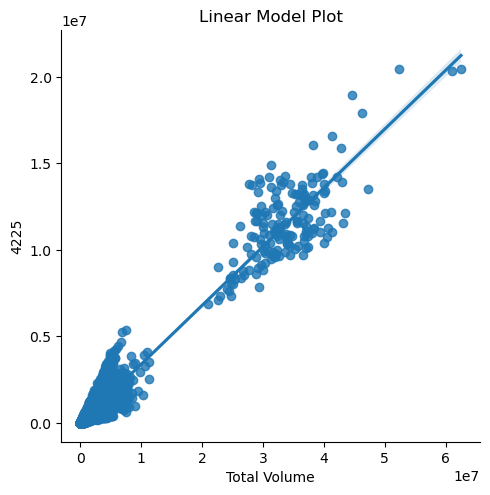

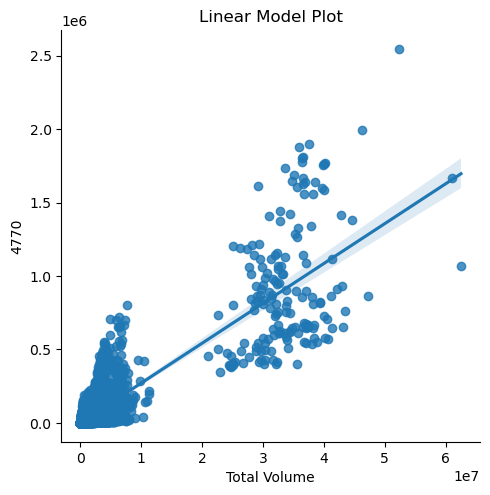

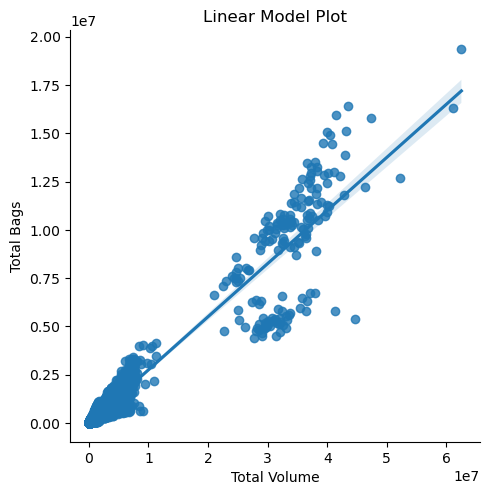

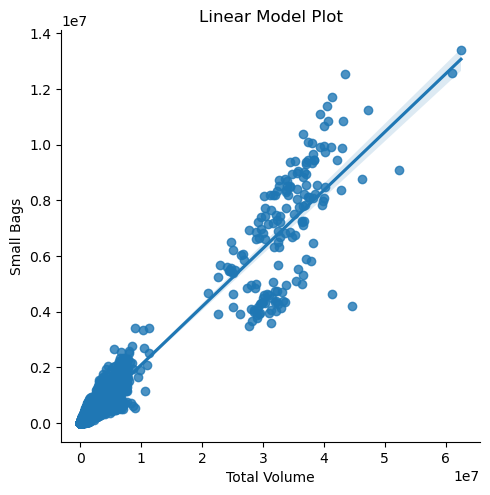

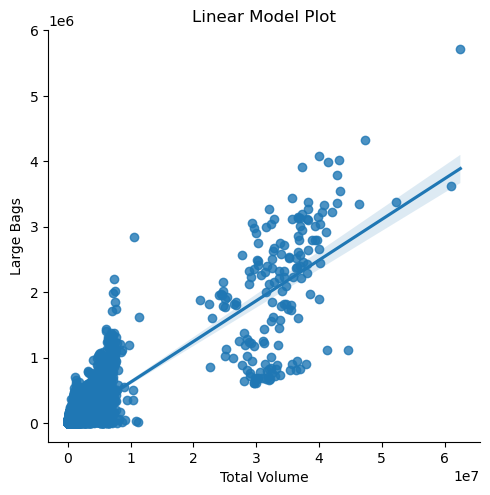

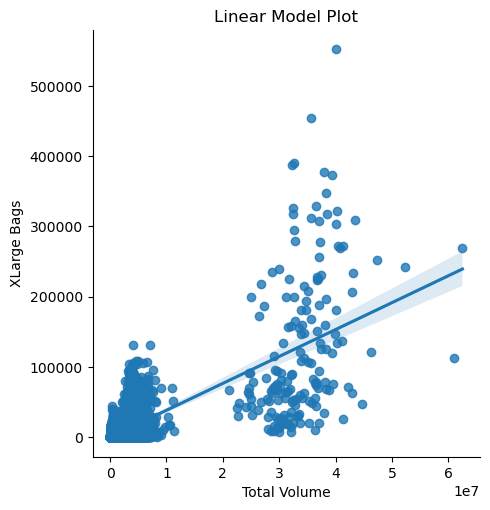

In [18]:
#checking linear relation of 'Total Volume' with other features 
log.append('Total Volume')#Appending feature
re()#calling function

**'Total Volume'** feature has **high postive linear relation** with **all of the remaining features.**

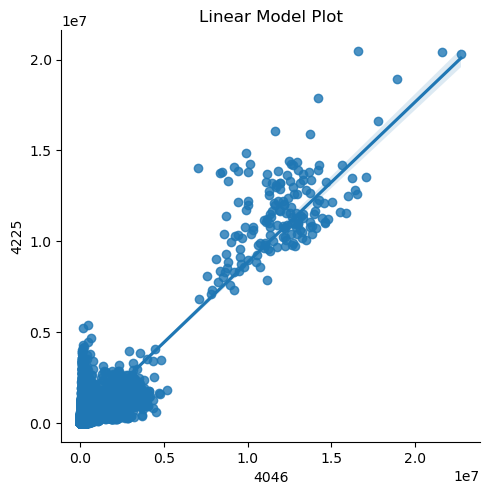

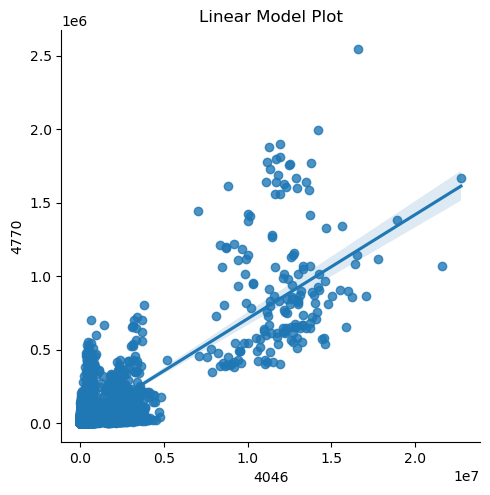

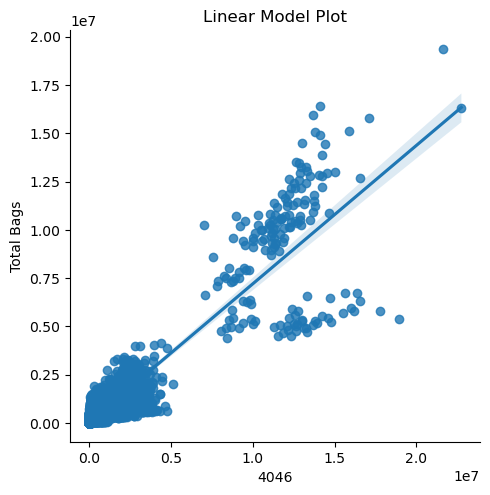

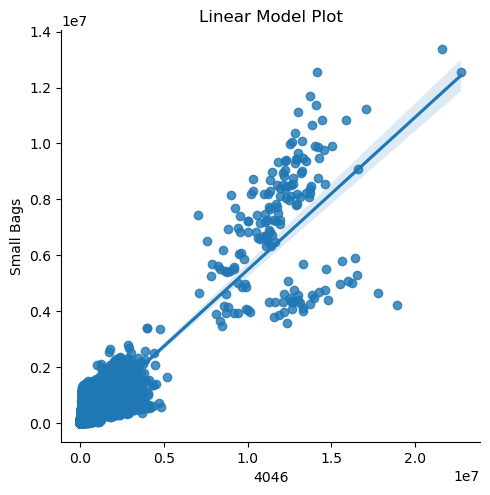

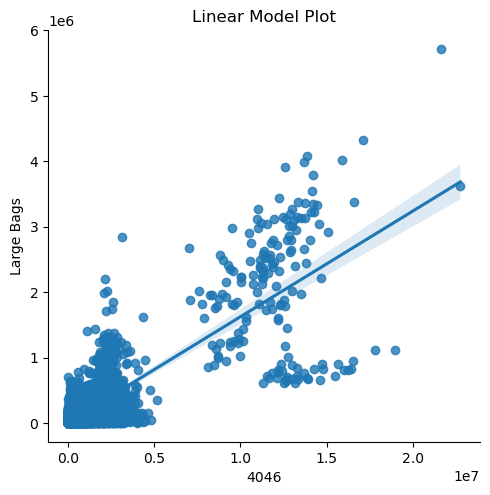

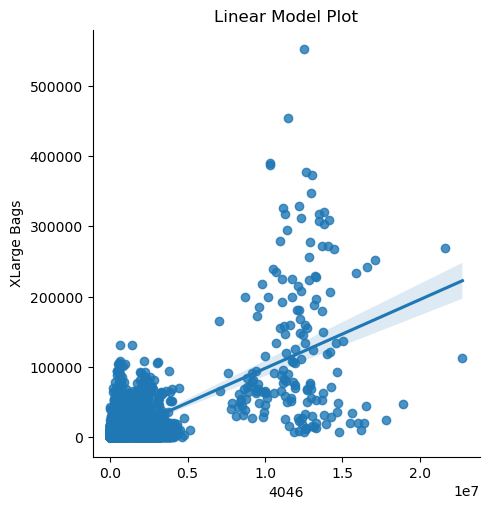

In [19]:
#checking linear relation of '4046' with other features 
log.append('4046')#Appending feature
re()#calling function

**'4046'** feature has **high postive linear relation** with **all of the remaining features.**

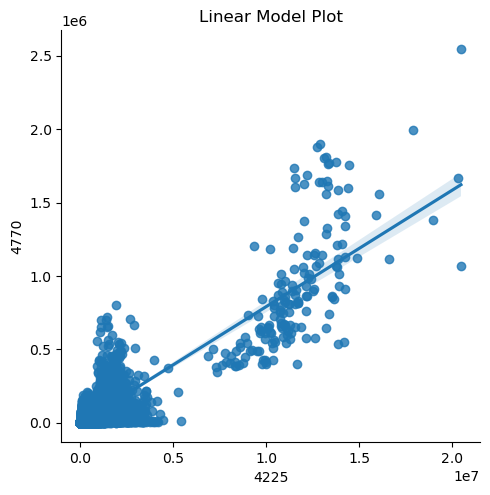

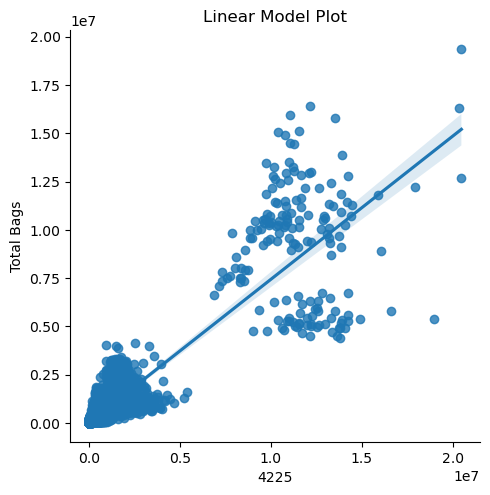

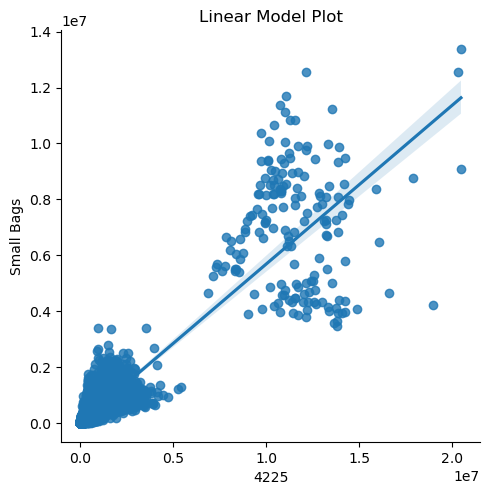

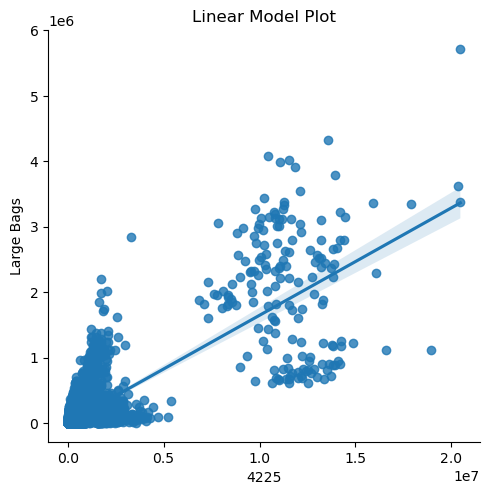

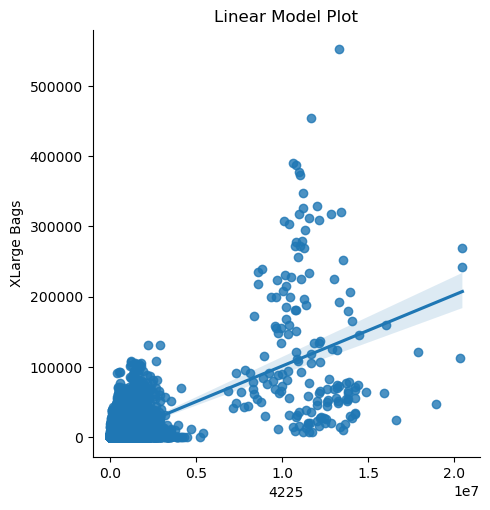

In [20]:
#checking linear relation of '4225' with other features 
log.append('4225')#Appending feature
re()#calling function

**'4225'** feature has **high postive linear relation** with **all of the remaining features.**

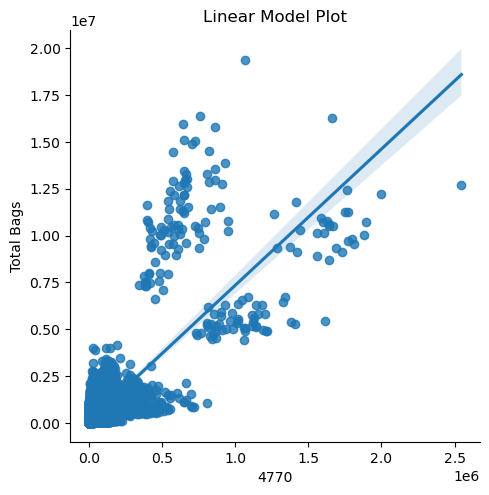

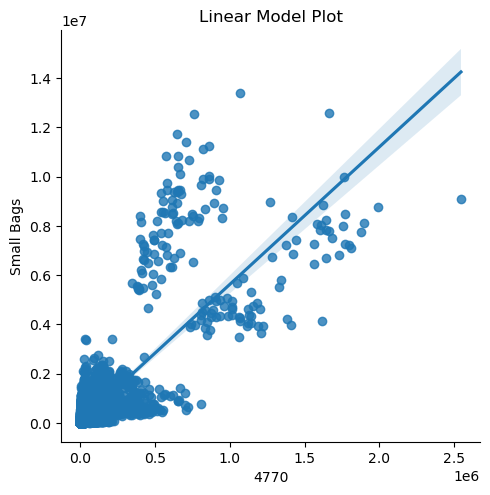

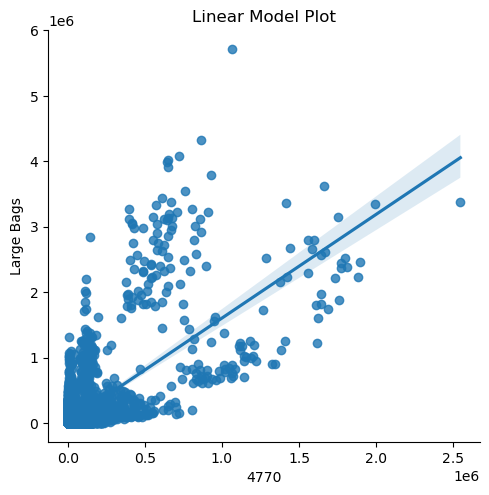

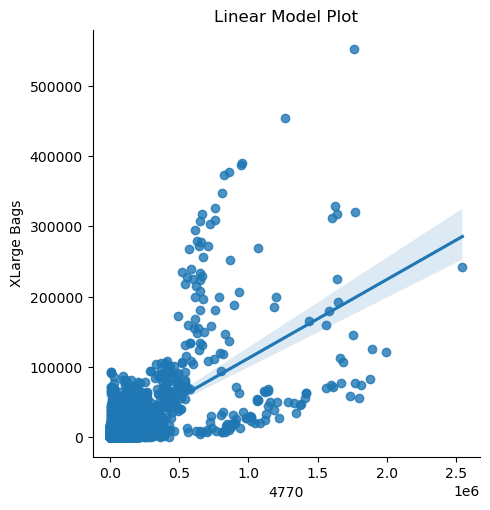

In [21]:
#checking linear relation of '4770' with other features 
log.append('4770')#Appending feature
re()#calling function

**'4770'** feature has **high postive linear relation** with **all of the remaining features.**

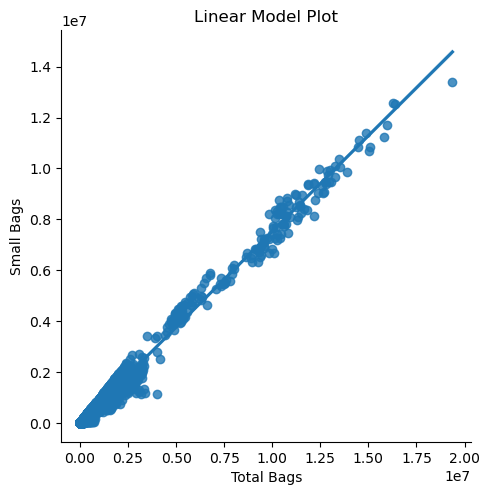

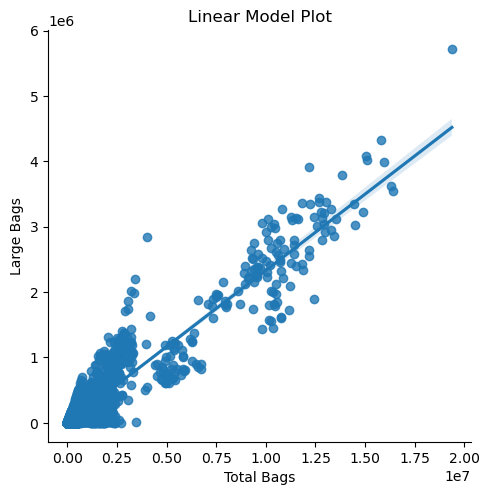

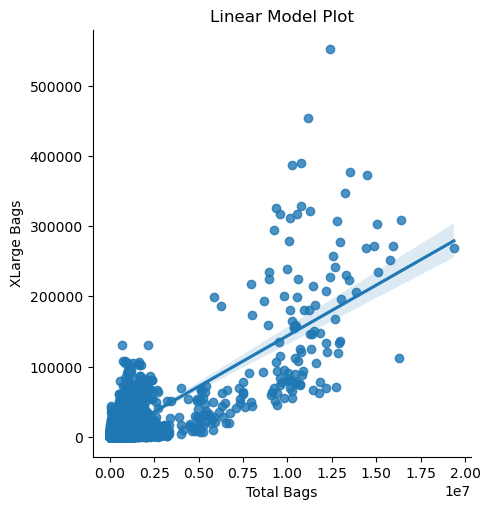

In [22]:
#checking linear relation of 'Total Bags' with other features 
log.append('Total Bags')#Appending feature
re()#calling function

**'Total Bags'** feature has **high postive linear relation** with **all of the remaining features.**

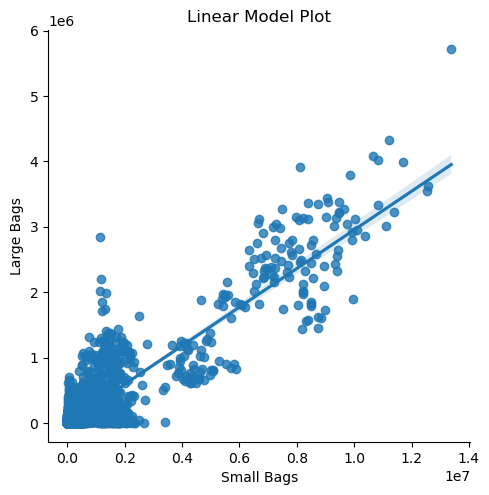

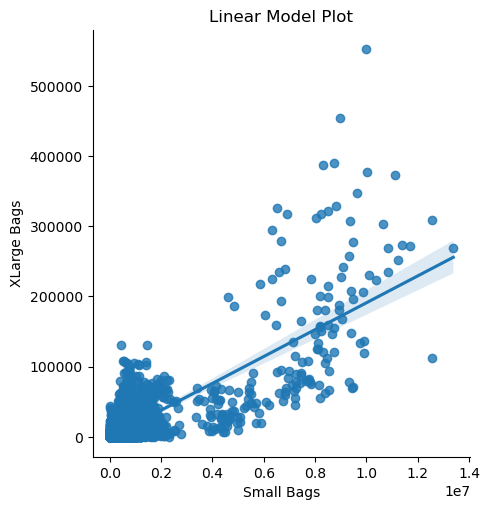

In [23]:
#checking linear relation of 'Small Bags' with other features 
log.append('Small Bags')#Appending feature
re()#calling function

**'Small Bags'** feature has **high postive linear relation** with **all of the remaining features.**

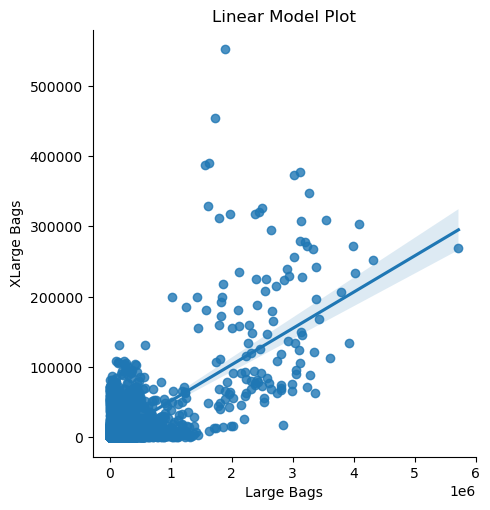

In [24]:
#checking linear relation between 'Large Bags' and 'XLarge Bags'  features 
log.append('Large Bags')#Appending feature
re()#calling function

**'Large Bags' and 'XLarge Bags'** features have **high postive linear relation** with each other.

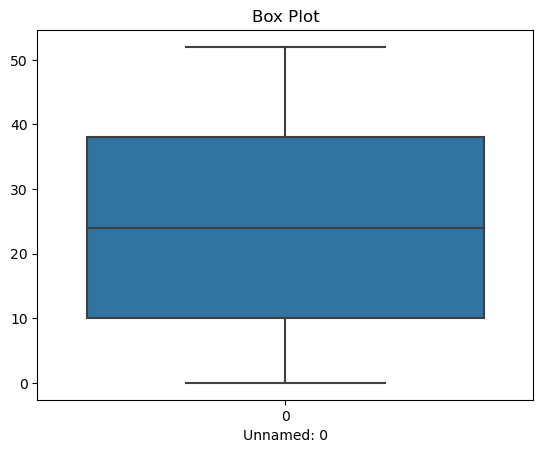

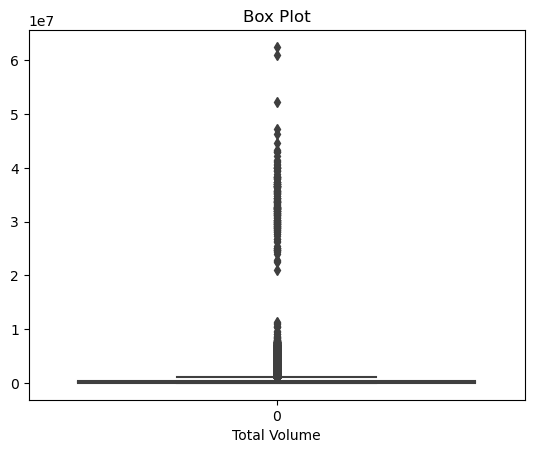

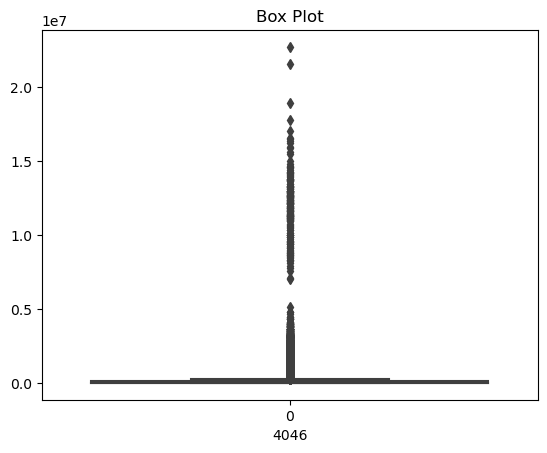

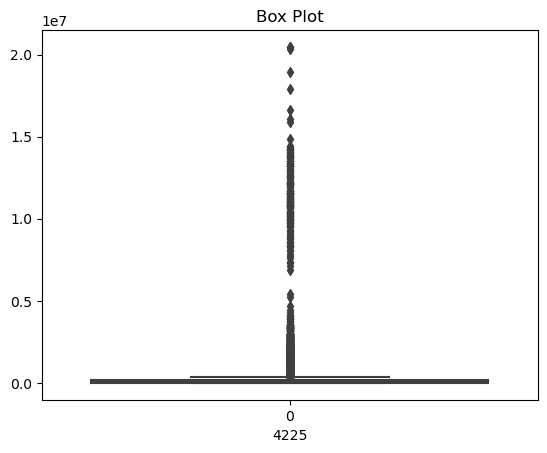

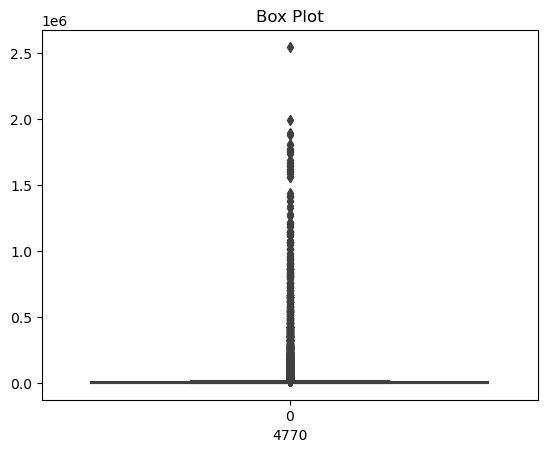

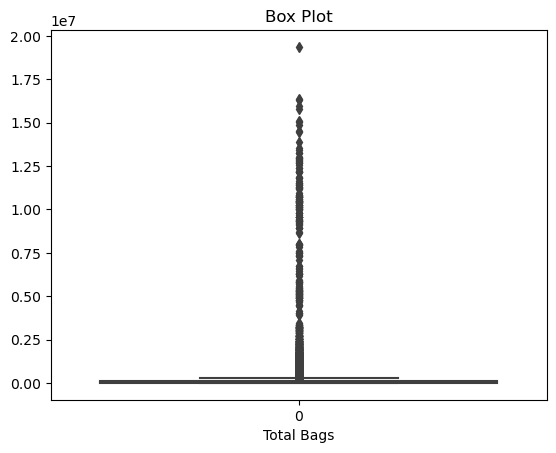

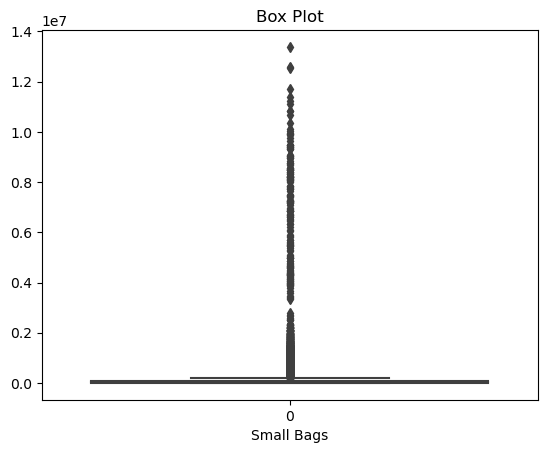

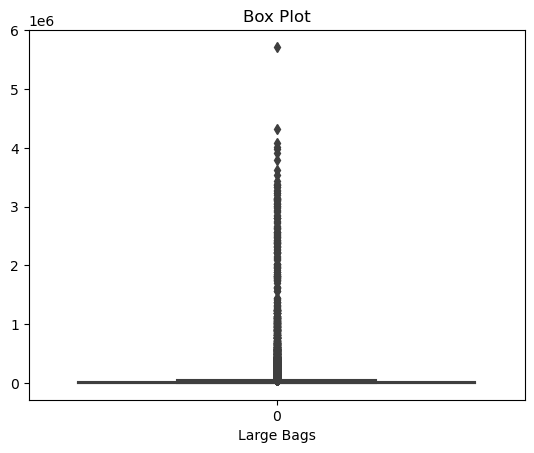

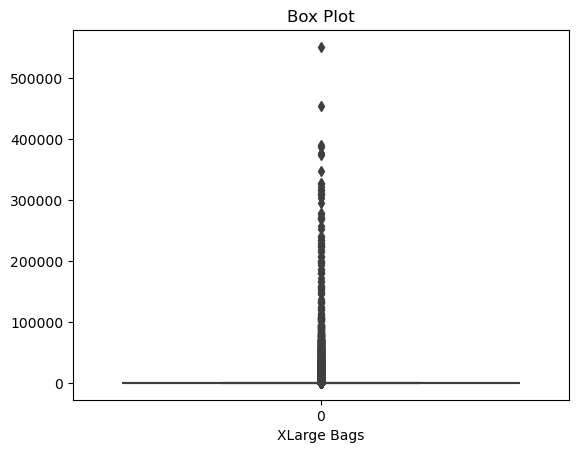

In [26]:
#Checking outliers via Box Plot
out=list(n_col)#creating new list with same data as 'n_col'

out.remove('AveragePrice')#removing target variable from the list

for i in out:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

All of these columns contains outliers **except** for **'Unnamed: 0' feature.**

In [27]:
#removing outliers using zscore method
#Importing necessary libraries
from scipy.stats import zscore as zs

out.remove('Unnamed: 0')#removing 'Unnamed: 0' feature from the list

f_outlier=df[out]
z=np.abs(zs(f_outlier))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Date,,,,,,,,
2015-12-27,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
2015-12-20,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2015-12-13,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
2015-12-06,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
2015-11-29,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
2018-02-04,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
2018-01-28,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
2018-01-21,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558


The **variable 'z'** holds the **zscores values** of these features.

In [28]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [30]:
#checking value of the outliers
z.iloc[346,1]

3.199410614794124

In [31]:
z.iloc[359,1]

3.558336677305513

In [32]:
z.iloc[780,7]

4.294450784267599

In [33]:
z.iloc[9111,6]

6.7769738918800755

We can confirm that these values holds outlier as per the threshold value.

In [34]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [35]:
#Using IQR method to remove outliers from the original data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((df< (q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [36]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 2.55904433119623
Data loss percentage after removing outliers via IQR method 35.62934955340019


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [37]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 467


In [39]:
df.shape#checking shape of data frame

(17782, 13)

Now the data frame has **17782 rows.**

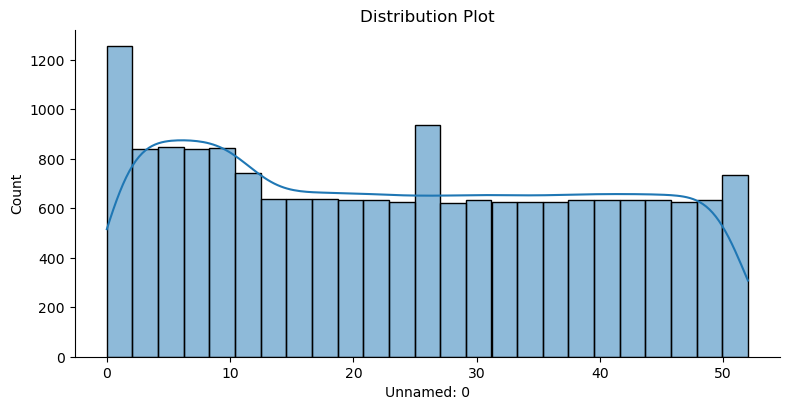

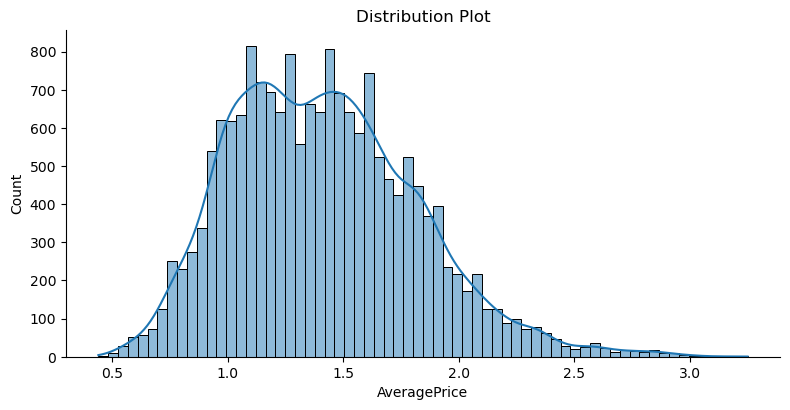

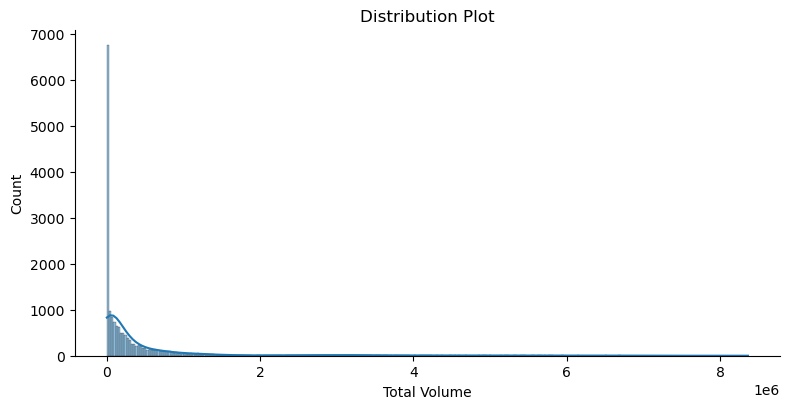

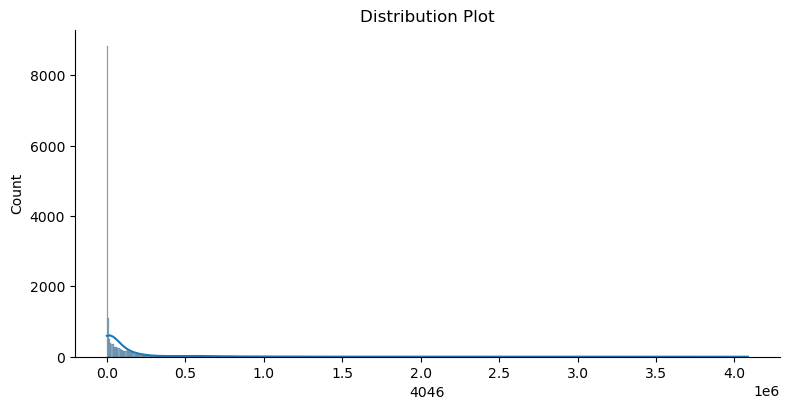

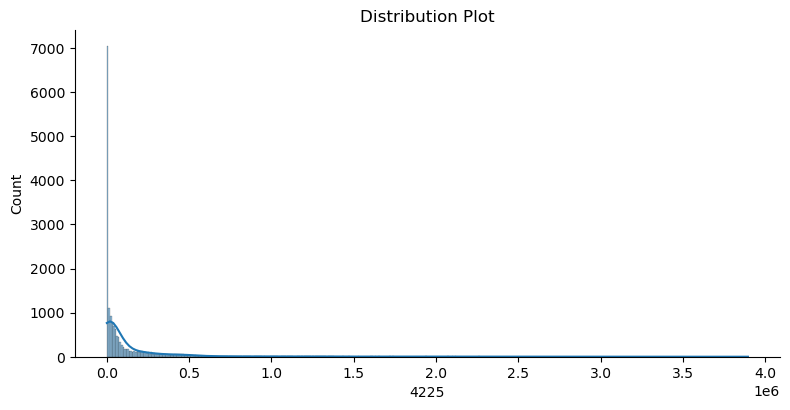

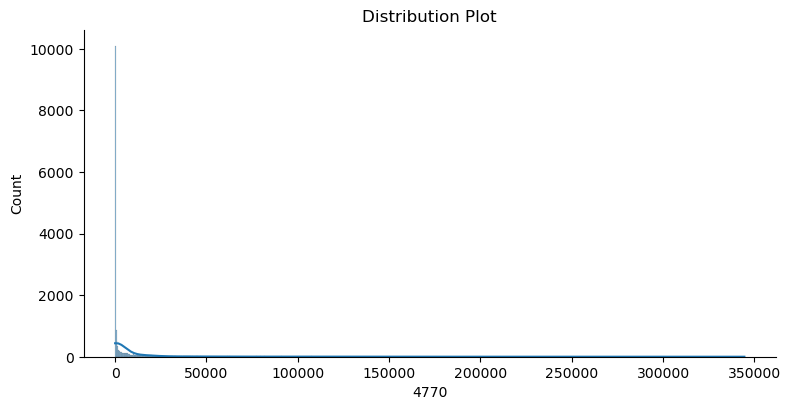

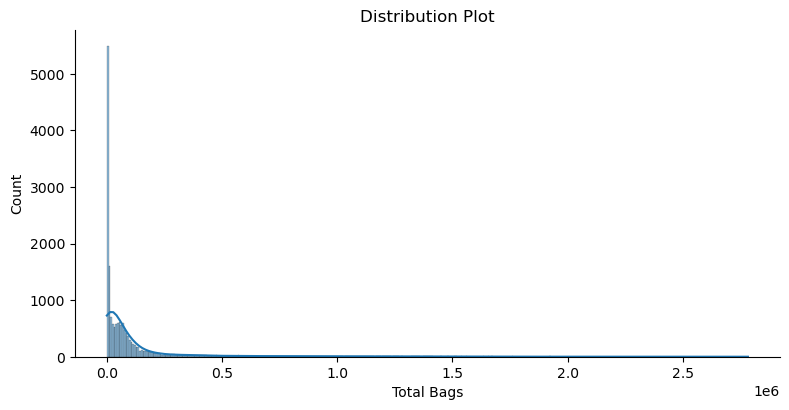

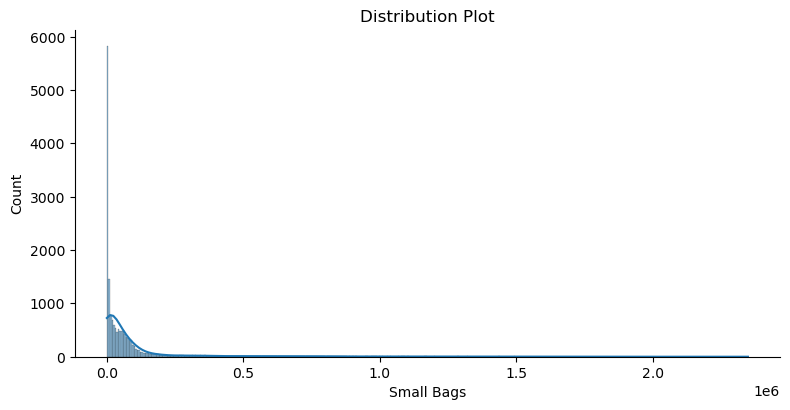

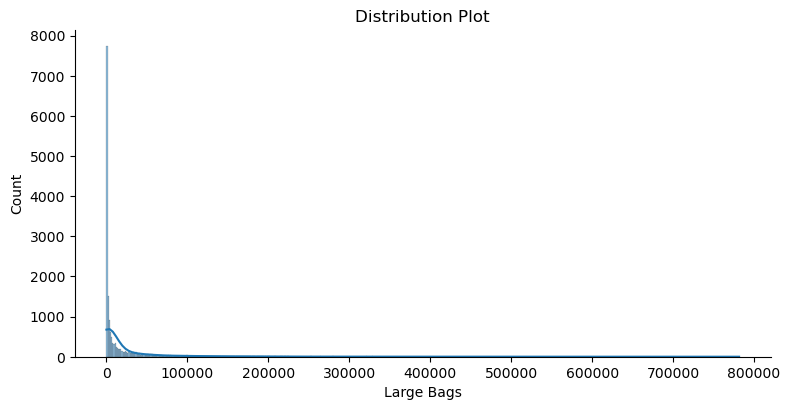

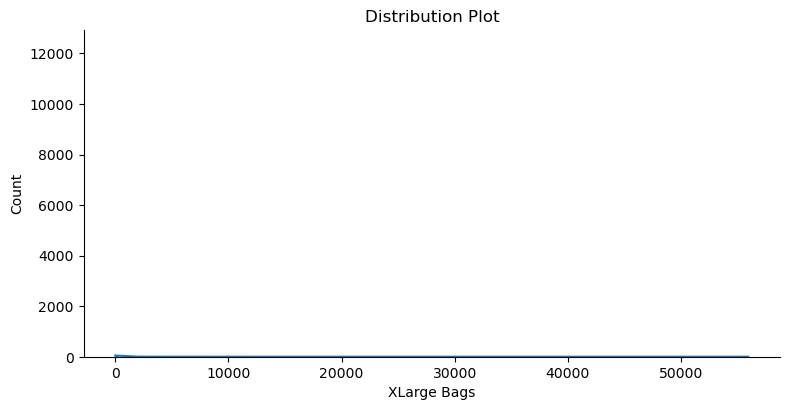

In [40]:
#checking distribution of columns
for i in n_col:
    sb.displot(df[i],kde=True,height=4,aspect=2)
    plt.title('Distribution Plot')    

All of the columns are skewed to the right **except** for **'Unnamed: 0' feature.**

In [41]:
df.skew()

Unnamed: 0      0.112971
AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
dtype: float64

All of the columns are in **unaccpetable range, except** for **'Unnamed: 0' and 'year' features.**, thus , we can use **yeojohnson method** to remove skewness. 

In [42]:
skew=list(n_col)#creating new list with same data as 'n_col'
skew.remove('Unnamed: 0')#removing 'Unnamed: 0' feature from the list

from scipy.stats import yeojohnson as yj #importing library

for i in skew:#iterating through 'skew' variable
    df[i],p=yj(df[i])
df.skew()

Unnamed: 0      0.112971
AveragePrice    0.004164
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
dtype: float64

**'XLarge Bags' feature** is still skewed to the right, therefore, we **can try cuberoot method**.

In [43]:
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])
df.skew()

Unnamed: 0      0.112971
AveragePrice    0.004164
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.777846
year            0.220792
dtype: float64

There is still skewness in **'XLarge Bags' feature** , hence, we can try **log + 1 method**.

In [44]:
df['XLarge Bags']=np.log1p(df['XLarge Bags'])
df.skew()

Unnamed: 0      0.112971
AveragePrice    0.004164
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.768931
year            0.220792
dtype: float64

There is still skewness in **'XLarge Bags' feature** , hence, we can try **square root method**.

In [45]:
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])
df.skew()

Unnamed: 0      0.112971
AveragePrice    0.004164
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.761884
year            0.220792
dtype: float64

There is still skewness in **'XLarge Bags' feature** , as some data are zero thus, other methods are not applicable ,hence, **we can accept this skewness value as threshold value.**

In [46]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,0.758551,11.682360,8.414996,17.961170,3.786332,12.628330,14.920261,5.596791,-0.0,conventional,2015,Albany
2015-12-20,1,0.765388,11.507289,7.798521,17.463193,3.963722,12.795590,15.147057,5.662726,-0.0,conventional,2015,Albany
2015-12-13,2,0.603911,12.362991,8.032281,19.770957,4.709184,12.505745,14.750415,5.746677,-0.0,conventional,2015,Albany
2015-12-06,3,0.666280,11.912638,8.542760,18.674414,4.166196,11.882714,13.892379,6.140037,-0.0,conventional,2015,Albany
2015-11-29,4,0.741127,11.426788,8.275612,17.418279,4.206164,11.996342,14.020947,6.749740,-0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,0.854027,10.217658,9.419831,10.177467,-0.000000,13.465493,15.998641,8.037522,-0.0,organic,2018,WestTexNewMexico
2018-01-28,8,0.877184,9.990983,8.617743,11.737135,-0.000000,12.747232,15.017330,7.557327,-0.0,organic,2018,WestTexNewMexico
2018-01-21,9,0.921010,9.981368,8.618013,11.076110,6.284165,12.773344,15.131771,4.473088,-0.0,organic,2018,WestTexNewMexico


In [47]:
df['year']=le.fit_transform(df['year'])#Transforming 'year' feature
df['type']=le.fit_transform(df['type'])#Transforming 'type' feature
df['region']=le.fit_transform(df['region'])#Transforming 'region' feature
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,0.758551,11.682360,8.414996,17.961170,3.786332,12.628330,14.920261,5.596791,-0.0,0,0,0
2015-12-20,1,0.765388,11.507289,7.798521,17.463193,3.963722,12.795590,15.147057,5.662726,-0.0,0,0,0
2015-12-13,2,0.603911,12.362991,8.032281,19.770957,4.709184,12.505745,14.750415,5.746677,-0.0,0,0,0
2015-12-06,3,0.666280,11.912638,8.542760,18.674414,4.166196,11.882714,13.892379,6.140037,-0.0,0,0,0
2015-11-29,4,0.741127,11.426788,8.275612,17.418279,4.206164,11.996342,14.020947,6.749740,-0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,0.854027,10.217658,9.419831,10.177467,-0.000000,13.465493,15.998641,8.037522,-0.0,1,3,53
2018-01-28,8,0.877184,9.990983,8.617743,11.737135,-0.000000,12.747232,15.017330,7.557327,-0.0,1,3,53
2018-01-21,9,0.921010,9.981368,8.618013,11.076110,6.284165,12.773344,15.131771,4.473088,-0.0,1,3,53


All the catagorical data have been encoded. 

In [48]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.139152,0.001060,0.017997,0.025490,0.031382,-0.041164,-0.047745,-0.026880,-0.069728,0.001355,-0.170120,-0.003042
AveragePrice,-0.139152,1.000000,-0.587269,-0.565674,-0.459192,-0.503849,-0.570170,-0.496959,-0.486112,-0.402251,0.614982,0.098923,0.005438
Total Volume,0.001060,-0.587269,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.626726,-0.800828,0.076584,0.065709
4046,0.017997,-0.565674,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573133,-0.725826,-0.002396,0.159390
4225,0.025490,-0.459192,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.579679,-0.747722,-0.004533,0.032273
4770,0.031382,-0.503849,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.614572,-0.780988,-0.051657,0.037805
Total Bags,-0.041164,-0.570170,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.608694,-0.725686,0.210924,0.065996
Small Bags,-0.047745,-0.496959,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.597035,-0.720466,0.185955,0.051985
Large Bags,-0.026880,-0.486112,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.449012,-0.500026,0.190295,0.086573
XLarge Bags,-0.069728,-0.402251,0.626726,0.573133,0.579679,0.614572,0.608694,0.597035,0.449012,1.000000,-0.673926,0.153275,-0.015623


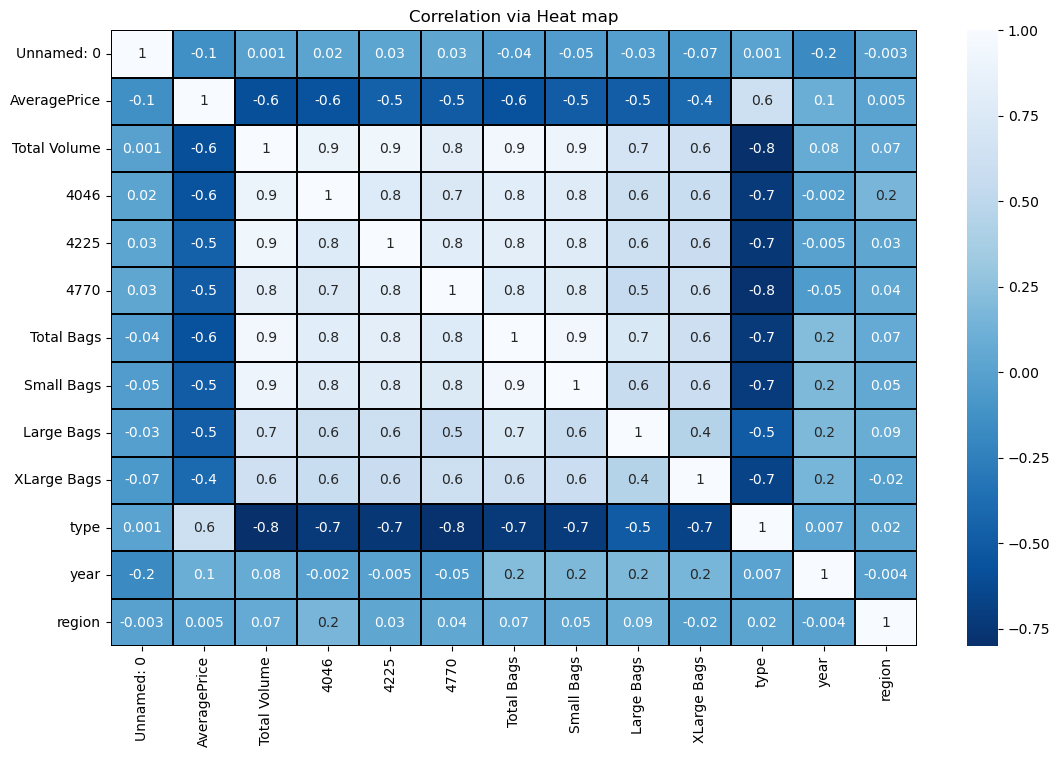

In [49]:
#Visualizing correlation via heat map
plt.figure(figsize=(13,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
1)**'Unnamed: 0'** feature has **low negative correlation** with **target variable.**  
2)**'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', and 'XLarge Bages'** features have **moderate negative correlation** with  **target variable.**   
3)**'type'** feature has **moderate positive correlation** with **target variable.**  
4)**'year' and 'region'** features have **low positive correlation** with **target variable.**  
5)These are the following **pairs with high positive correlation with each other:**  
  
**'Total Volume' and '4046'** features  
**'Total Volume' and '4225'** features  
**'Total Volume' and '4770'** features  
**'Total Volume' and 'Total Bags'** features  
**'Total Volume' and 'Small Bags'** features  
**'4046' and '4225'** features  
**'4046' and 'Total Bag's** features  
**'4046' and 'Small Bags'** features  
**'4225' and '4770'** features  
**'4225' and '4225'** features  
**'4225' and 'Small Bags'** features  
**'4770' and 'Total Bags'** features  
**'4770' and 'Small Bags'** features  
**'Total Bags' and 'Small Bags'** features  
  
These are the following **pairs with high negative correlation with each other:**  
**'Total Volume' and 'type'** features  
**'4770' and 'type'** features 

In [50]:
#Separating features and target variable 
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [51]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (17782, 12) 
Dimensions of label: (17782,)


We can observe that both features and lable have **same number of rows**.  
'x' contains 12 features.

In [52]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.563780,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.68975,-1.026443,-1.214908,-1.698613
1,-1.499180,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.68975,-1.026443,-1.214908,-1.698613
2,-1.434581,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.68975,-1.026443,-1.214908,-1.698613
3,-1.369981,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.68975,-1.026443,-1.214908,-1.698613
4,-1.305382,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.68975,-1.026443,-1.214908,-1.698613
...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.111584,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.68975,0.974238,1.979143,1.742552
17778,-1.046985,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.68975,0.974238,1.979143,1.742552
17779,-0.982385,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.68975,0.974238,1.979143,1.742552
17780,-0.917786,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.68975,0.974238,1.979143,1.742552


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [53]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.043036,Unnamed: 0
1,52.028370,Total Volume
2,7.149194,4046
3,11.162782,4225
4,3.944107,4770
5,34.443695,Total Bags
6,16.656367,Small Bags
7,3.462826,Large Bags
8,2.061663,XLarge Bags
9,3.777475,type


**'Total Volume'** feature has **high VIF value**, thus posing **multicollinearity problem**. We can **drop 'Total Volume'** feature as it has the **highest VIF value.** 

In [54]:
x.drop('Total Volume',axis=1,inplace=True)#Dropping 'Total Volume' feature
x

,Unnamed: 0,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.563780,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.68975,-1.026443,-1.214908,-1.698613
1,-1.499180,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.68975,-1.026443,-1.214908,-1.698613
2,-1.434581,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.68975,-1.026443,-1.214908,-1.698613
3,-1.369981,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.68975,-1.026443,-1.214908,-1.698613
4,-1.305382,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.68975,-1.026443,-1.214908,-1.698613
...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.111584,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.68975,0.974238,1.979143,1.742552
17778,-1.046985,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.68975,0.974238,1.979143,1.742552
17779,-0.982385,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.68975,0.974238,1.979143,1.742552
17780,-0.917786,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.68975,0.974238,1.979143,1.742552


**'Total Volume'** feature is **dropped successfully.** Now 'x' has 11 features.

In [55]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.042594,Unnamed: 0
1,3.729708,4046
2,4.277299,4225
3,3.930144,4770
4,24.468441,Total Bags
5,16.655943,Small Bags
6,3.420225,Large Bags
7,2.049079,XLarge Bags
8,3.562089,type
9,1.335324,year


**'Total Bags', and 'Small Bags'** features still have **high VIF values**, thus we can **drop 'Total Bags'** feature as it has the **highest VIF value.** 

In [56]:
x.drop('Total Bags',axis=1,inplace=True)#Dropping 'Total Bags' feature
x

,Unnamed: 0,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.563780,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.68975,-1.026443,-1.214908,-1.698613
1,-1.499180,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.68975,-1.026443,-1.214908,-1.698613
2,-1.434581,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.68975,-1.026443,-1.214908,-1.698613
3,-1.369981,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.68975,-1.026443,-1.214908,-1.698613
4,-1.305382,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.68975,-1.026443,-1.214908,-1.698613
...,...,...,...,...,...,...,...,...,...,...
17777,-1.111584,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.68975,0.974238,1.979143,1.742552
17778,-1.046985,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.68975,0.974238,1.979143,1.742552
17779,-0.982385,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.68975,0.974238,1.979143,1.742552
17780,-0.917786,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.68975,0.974238,1.979143,1.742552


**'Total Bags'** feature is **dropped successfully.** Now 'x' has 10 features.

In [57]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.042421,Unnamed: 0
1,3.712226,4046
2,4.135427,4225
3,3.929712,4770
4,4.087143,Small Bags
5,1.861704,Large Bags
6,2.049020,XLarge Bags
7,3.558929,type
8,1.312425,year
9,1.078152,region


Now the multicollinearity problem is solved.

In [58]:
#Importing libraries required for model building
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.svm import SVR as SupportVectorRegression

In [60]:
#Finding best random state on Linear Regression model
r2s_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,1000): #running 'if' loop for 999 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    lr=LinearRegression()#creating instance
    
    lr.fit(x_train,y_train)#fitting  data
    pr=lr.predict(x_test)#predicting data
    r2s=r2_score(y_test,pr)#calculating r2 score 
    
    if r2s>r2s_updater: #using if condition to update 'r2s_updater' and 'rs_updater' only if 'r2s' is greater than 'r2s_updater'
        #updating values
        r2s_updater=r2s
        rs_updater=i

print('Max r2 score during the iteration is ',r2s_updater,'on random state : ',rs_updater)#printing

Max r2 score during the iteration is  0.5228813193225375 on random state :  731


In [61]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [62]:
#Creating instance of  various models
LR=LinearRegression() 
L=Lasso()
R=Ridge()
EN=ElasticNet()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ETR=ExtraTreesRegressor()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
SVR=SupportVectorRegression()
    
models=[LR,L,R,EN,RFR,GBR,ETR,DTR,KNR,SVR]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity    

for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data
    pr=i.predict(x_test)#predicting data
    
    R2score=r2_score(y_test,pr)#calculating r2 score
    MAE=mae(y_test,pr)#calculating Mean Absolute Error
    MSE=mse(y_test,pr)#calculating Mean Squared Error
    RMSE=np.sqrt(MSE)#calculating Root Mean Squared Error
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(R2score - score.mean())*100 #calculating difference of R2score and Cross Validation Score
    
    
    
    #Printing    
    print('\n','R2 score of',str(i).split('(')[0],'is',R2score,'\n','Mean absolute Error of',str(i).split('(')[0],'is',MAE,'\n','Mean squared error of',str(i).split('(')[0],'is',MSE,'\n','Root Mean squared error of',str(i).split('(')[0],'is',RMSE)
    print('\n\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between R2 score and cross validation is ',diff)
    
    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when 'log' is greater than 'diff' and mean of 'score' in not negative
        
        log=diff#Updating 'log' variable if condition is 'True'
        b_d=diff#Storing difference in 'b_d' variable in context to  the corresponding iteration 
        
        model=str(i).split('(')[0]#Storing model name in 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between R2 score and cross validation i.e {b_d}')#Printing         


 R2 score of LinearRegression is 0.5228813193225375 
 Mean absolute Error of LinearRegression is 0.07229863642934821 
 Mean squared error of LinearRegression is 0.008373183548384204 
 Root Mean squared error of LinearRegression is 0.09150510121509185


Cross validation Score of LinearRegression is [-0.32064619  0.07480504  0.37810163  0.16426575  0.09335151] 
Mean:  0.07797554862914517 
Difference between R2 score and cross validation is  44.490577069339224

 R2 score of Lasso is -0.00012224984818631768 
 Mean absolute Error of Lasso is 0.10901660507025931 
 Mean squared error of Lasso is 0.017551622914682912 
 Root Mean squared error of Lasso is 0.13248253815006306


Cross validation Score of Lasso is [-2.87135431 -0.57598315 -0.06601187 -0.49746879 -0.93145667] 
Mean:  -0.9884549567044859 
Difference between R2 score and cross validation is  98.83327068562996

 R2 score of Ridge is 0.5228756240509549 
 Mean absolute Error of Ridge is 0.07229892121258268 
 Mean squared error of Ridge

Here by comparing difference of R2 score and cross validation  of various models, we can conclude that **GradientBoostingRegressor is the best performing model** as it has the least difference between R2 score and cross validation than the rest of the models.

In [63]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'loss':['squared_error','absolute_error','quantile'],'learning_rate':[0.01,0.1,0.2],'n_estimators':[50,100,150]}#defining hyper parameters

gsc=GSC(GBR,pa)#creating instance
gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters

{'learning_rate': 0.2, 'loss': 'squared_error', 'n_estimators': 150}

In [64]:
#Applying best parameters provided by GridSearchCV
final=GradientBoostingRegressor(learning_rate=0.2,loss='squared_error',n_estimators=150)

In [65]:
final.fit(x_train,y_train)#fitting data
pr=final.predict(x_test)#predicting data

print('R2 score :',r2_score(y_test,pr))#printing 
print('Mean Absolute Error:',mae(y_test,pr))#printing
print('Mean Squared Error :',mse(y_test,pr))#printing
print('Root Mean Squared Error:',np.sqrt(MSE))#printing

R2 score : 0.8284816106631963
Mean Absolute Error: 0.04218529883755437
Mean Squared Error : 0.0030100581134259504
Root Mean Squared Error: 0.06094118672014197


Model's r2 score is **increased** from **39% to 82%** and there is decrease in errors.

In [66]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})#creating new data frame with Predicted and Original values
conclusion.sample(20)

,Predicted Values,Original Values
Date,,
2015-02-08,0.903547,0.880018
2015-11-08,0.649009,0.625362
2017-12-24,0.917805,0.910348
2016-08-07,0.856052,0.820693
2016-10-02,0.894455,0.899494
2017-04-23,0.839438,0.868603
2018-02-18,0.918802,0.923646
2015-06-28,0.897877,0.959382
2017-08-06,0.816648,0.744650


Here we can conclude that the model **predicted values** are **fairly close enough** to the **original values.** 

In [67]:
#Saving the model
import joblib#importing library
joblib.dump(final,r'D:\Models\A_R.obj')#saving model into desired path

['D:\\Models\\A_R.obj']

Now we are going to treat **'Region' as target variable.**

In [68]:
#re-importing data set
df=pd.read_csv(r'D:\Files\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Data frame has **18249 rows and 14 columns** out of which 13 columns are inputs and 1 column is **target variable i.e 'region' column**.  
As the target variable has **catagorical data**,thus it represents **Classification problem.**  
The goal is to **predict region**.


From the previous analysis, we observed that the **'Date' feature's data type** should be **datetime64**, **statistical information** of the **numerical columns**, **no duplicates or null values** were found, and we conducted **various graphical analyses** of each columns.

In [69]:
#changing data type of 'Date' feature
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

**'Date' feature's data type** is changed from 'object' **to 'datetime64[ns]' successfully.**

In [70]:
df.set_index('Date',inplace=True)#setting date as index of the data frame
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


**'Date' feature** is **set as index** successfully. Now data frame has **13 columns**.

In [71]:
#fetching details of columns, such as Unique values, Number of unique values and their value counts
col=df.columns.to_list()

for i in col:#Iterating through 'col' variable
    print('\n',i,':-\nUnique values:',df[i].unique(),'\nNumber of unique values:',df[i].nunique(),'\n\n',df[i].value_counts().to_frame('Value Counts'))#Printing


 Unnamed: 0 :-
Unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52] 
Number of unique values: 53 

     Value Counts
0            432
7            432
1            432
11           432
9            432
8            432
10           432
6            432
5            432
4            432
3            432
2            432
41           324
34           324
35           324
36           324
37           324
38           324
39           324
40           324
47           324
42           324
43           324
44           324
45           324
46           324
32           324
48           324
49           324
50           324
33           324
26           324
31           324
30           324
12           324
13           324
14           324
15           324
16           324
17           324
18           324
19           324
20           324
21           324
22       

This gives a breif information about **unique values, count of unique values and value counts** of each column present in the dataset.  
**Most of the values** present in **'Total Volume', 'Total Bags' and  'Small Bags'** features are **unqiue.**  
There are **54 unique regions** present in **target variable.** **All regions** have **same count, except** for **'WestTexNewMexico'** region, thus, this data is slightly imbalance.

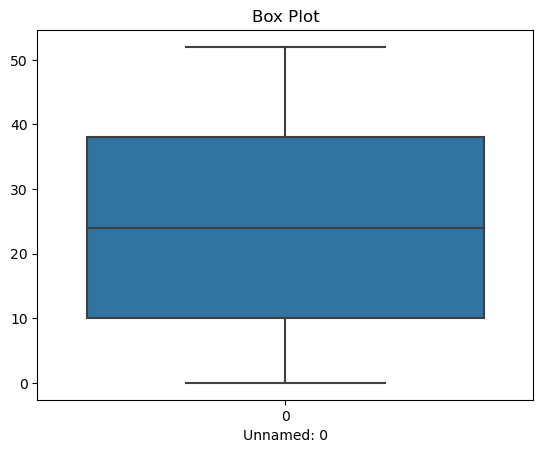

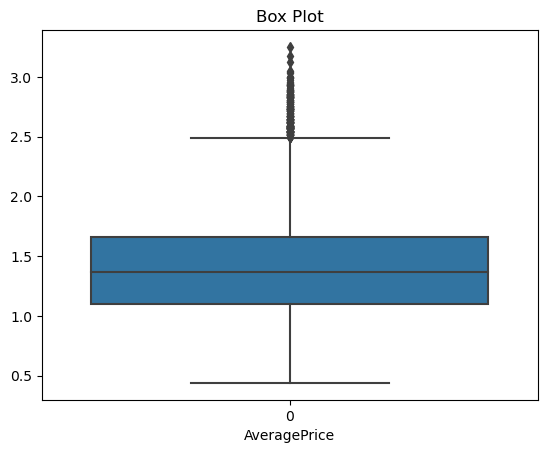

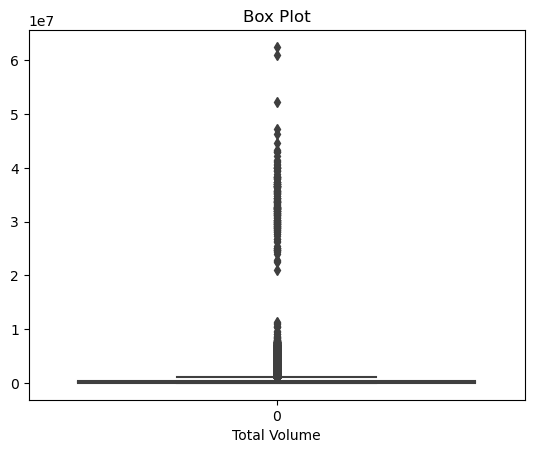

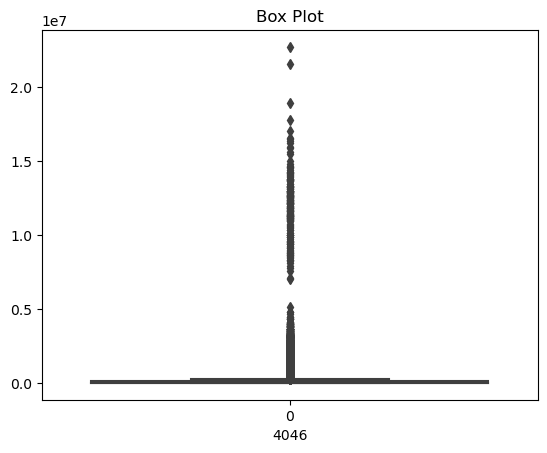

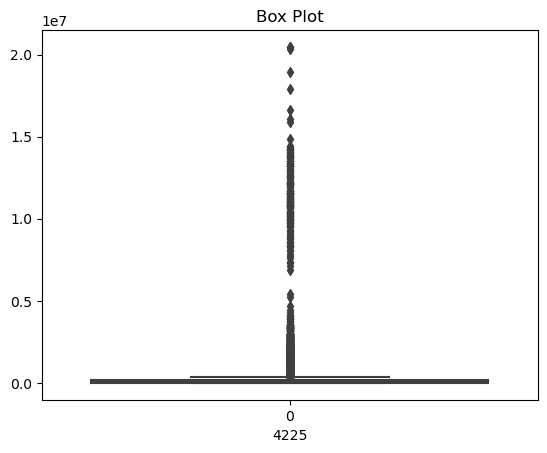

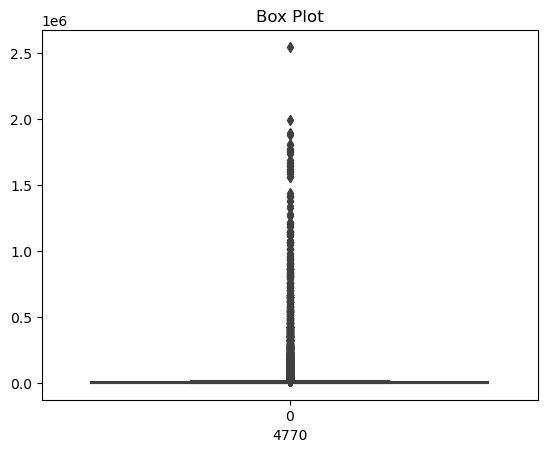

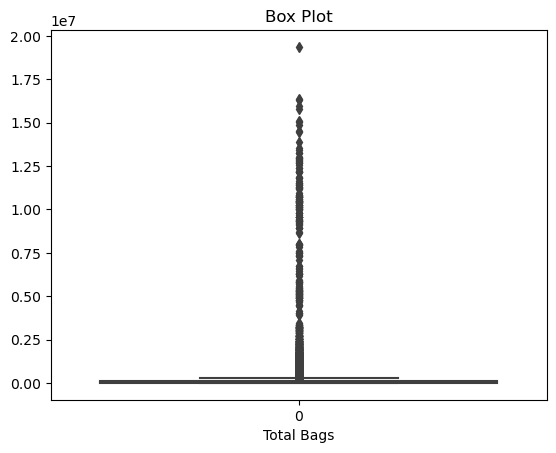

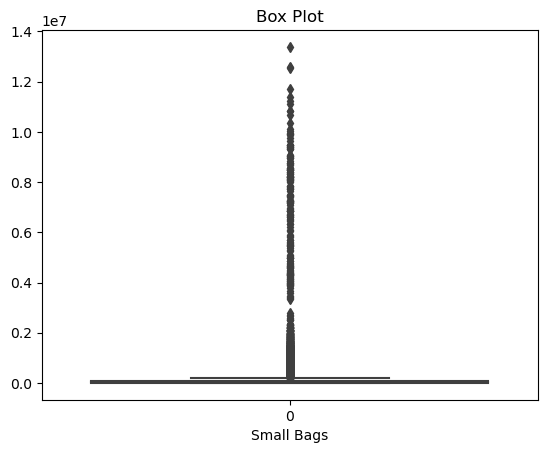

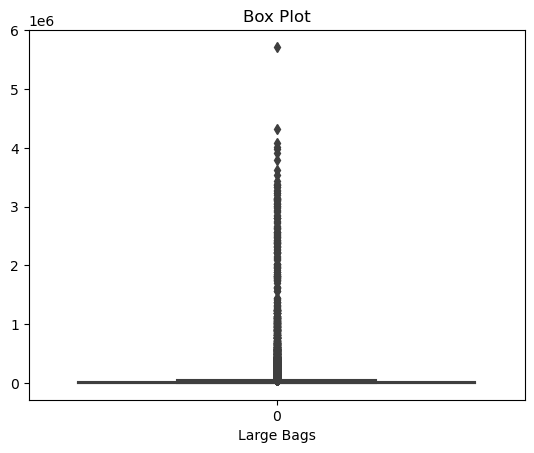

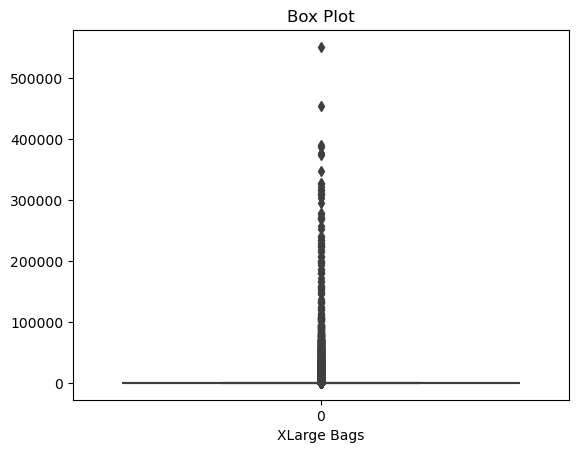

In [72]:
#Checking outliers via Box Plot
n_col=[]#creating empty list

for i in col:#iterating through 'col' variable 
    if df[i].dtypes!='object':#using if condition to execute the following code only if the columns contains numeric values
        n_col.append(i)#appending 'i'

n_col.remove('year')#removing year from the list

for i in n_col:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

All of these features contains outliers **except** for **'Unnamed: 0' feature.**

In [73]:
#removing outliers using zscore method
#Importing necessary libraries
from scipy.stats import zscore as zs

out=list(n_col)#creating new list with same data as 'n_col'
out.remove('Unnamed: 0')#removing target variable from the list

f_outlier=df[out]
z=np.abs(zs(f_outlier))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Date,,,,,,,,,
2015-12-27,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
2015-12-20,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2015-12-13,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
2015-12-06,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
2015-11-29,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...,...
2018-02-04,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
2018-01-28,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
2018-01-21,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558


The **variable 'z'** holds the **zscores values** of these features.

In [74]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [75]:
#checking value of the outliers
z.iloc[346,2]

3.199410614794124

In [76]:
z.iloc[359,2]

3.558336677305513

In [77]:
z.iloc[780,8]

4.294450784267599

In [78]:
z.iloc[17304,0]

3.0646318625587496

We can confirm that these values holds outlier as per the threshold value.

In [79]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [80]:
#Using IQR method to remove outliers from the original data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((df< (q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [81]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 3.276891884486821
Data loss percentage after removing outliers via IQR method 36.774617787276014


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [82]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 598


In [83]:
df.shape#checking shape of data frame

(17651, 13)

Now the data frame has **17651 rows.**

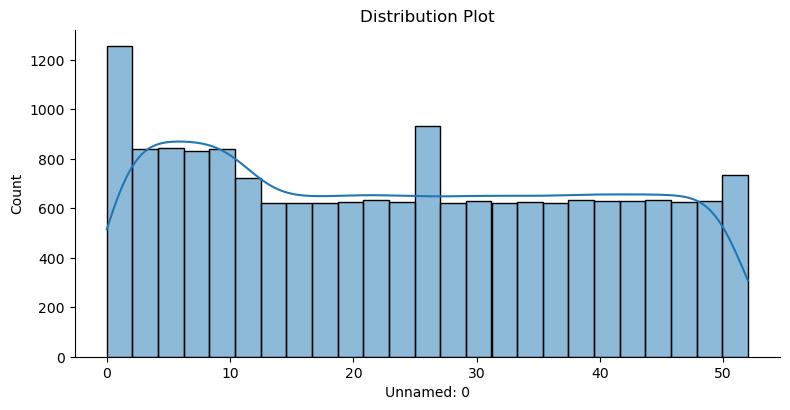

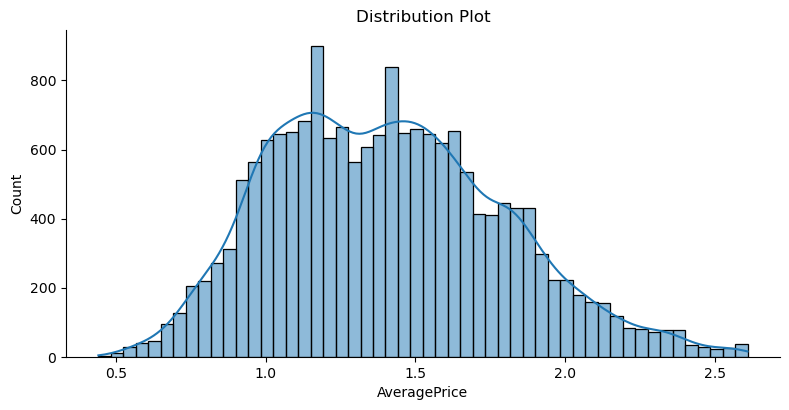

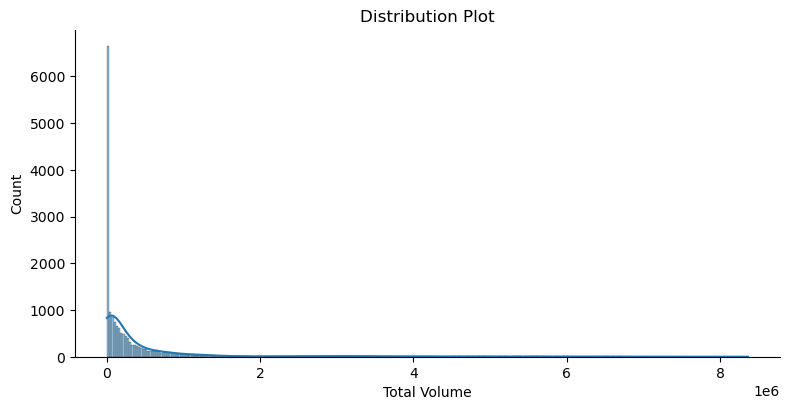

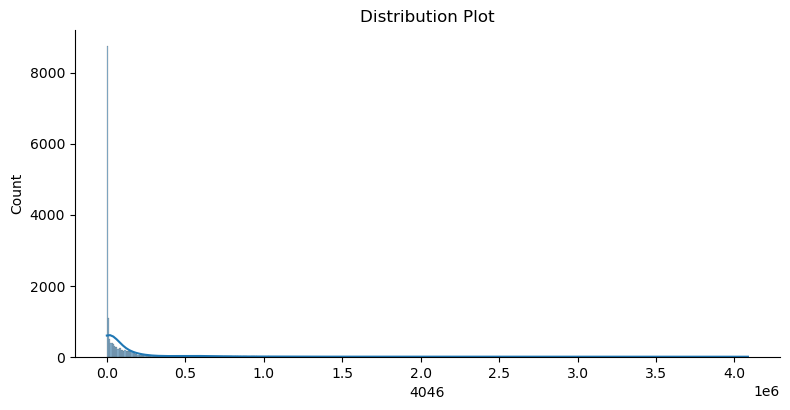

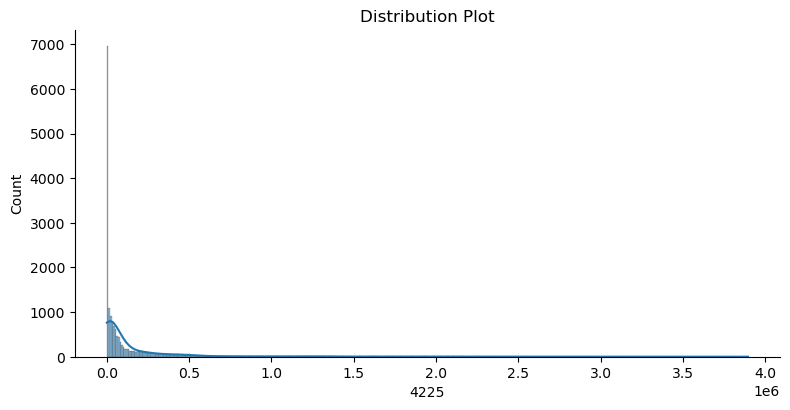

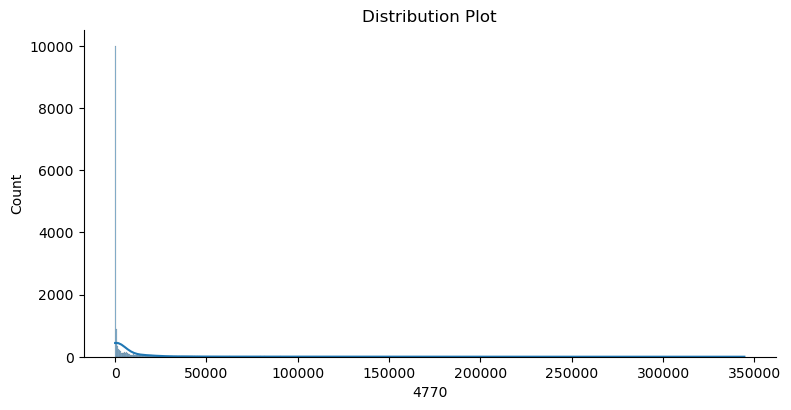

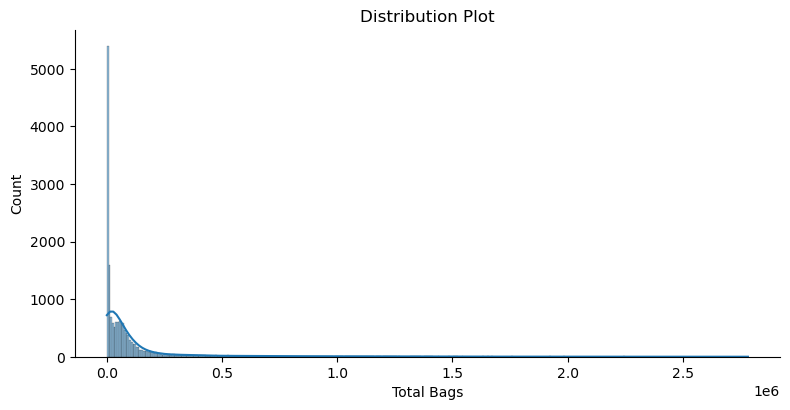

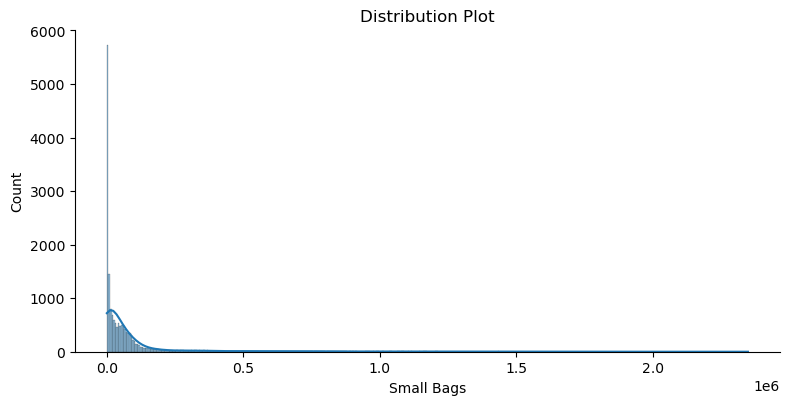

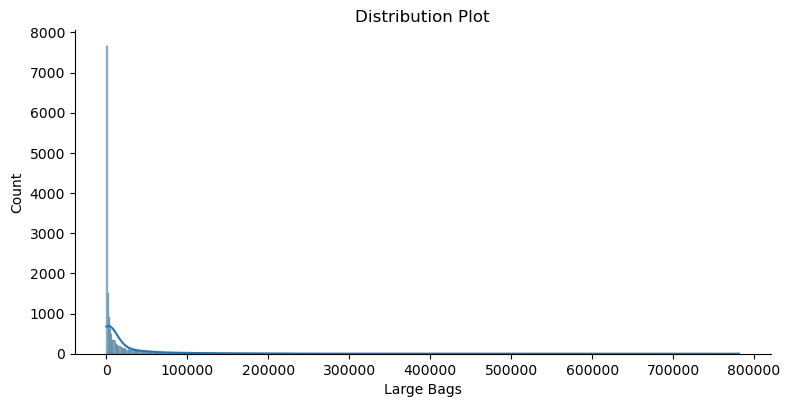

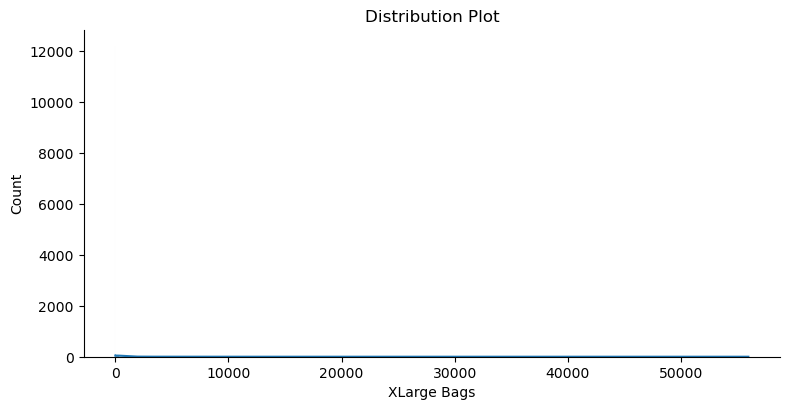

In [84]:
#checking distribution of columns
for i in n_col:
    sb.displot(df[i],kde=True,height=4,aspect=2)
    plt.title('Distribution Plot')    

All of the columns are skewed to the right **except** for **'Unnamed: 0' and 'AveragePrice' features.**

In [85]:
df.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
dtype: float64

All of the columns are in **unaccpetable range, except** for **'Unnamed: 0','AveragePrice' and 'year' features.**, thus , we can use **yeojohnson method** to remove skewness. 

In [86]:
skew=list(n_col)#creating new list with same data as 'n_col'

skew.remove('Unnamed: 0')#removing 'Unnamed: 0' feature from the list
skew.remove('AveragePrice')#removing 'AveragePrice' feature from the list

from scipy.stats import yeojohnson as yj #importing library

for i in skew:#iterating through 'skew' variable
    df[i],p=yj(df[i])

df.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.229976
dtype: float64

**'XLarge Bags' feature** is still skewed to the right, therefore, we **can try cuberoot method**.

In [87]:
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])
df.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.770677
year            0.229976
dtype: float64

There is still skewness in **'XLarge Bags' feature** , hence, we can try **log + 1 method**.

In [88]:
df['XLarge Bags']=np.log1p(df['XLarge Bags'])
df.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.761708
year            0.229976
dtype: float64

There is still skewness in **'XLarge Bags' feature** , hence, we can try **square root method**.

In [89]:
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])
df.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.754629
year            0.229976
dtype: float64

There is still skewness in **'XLarge Bags' feature** , as some data are zero thus, other methods are not applicable ,hence, **we can accept this skewness value as threshold value.**

In [90]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,11.859698,8.459046,18.125626,3.800782,12.604637,14.988007,5.609263,-0.0,conventional,2015,Albany
2015-12-20,1,1.35,11.679417,7.836672,17.619790,3.979574,12.771325,15.216601,5.675475,-0.0,conventional,2015,Albany
2015-12-13,2,0.93,12.561302,8.072625,19.965175,4.731656,12.482466,14.816826,5.759783,-0.0,conventional,2015,Albany
2015-12-06,3,1.08,12.096944,8.588079,18.850378,4.183730,11.861497,13.952201,6.154871,-0.0,conventional,2015,Albany
2015-11-29,4,1.28,11.596546,8.318295,17.574174,4.224040,11.974755,14.081739,6.767433,-0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,10.353750,9.474294,10.237344,-0.000000,13.438887,16.075093,8.061951,-0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,10.121168,8.663815,11.814608,-0.000000,12.723133,15.085843,7.579136,-0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,10.111306,8.664087,11.145900,6.324553,12.749156,15.201193,4.481260,-0.0,organic,2018,WestTexNewMexico


In [91]:
df['year']=le.fit_transform(df['year'])#Transforming 'year' feature
df['type']=le.fit_transform(df['type'])#Transforming 'type' feature

rg=pd.DataFrame()#creating empty data frame to compare encoded values
rg['Origianl Value']=df['region']#storing region column in 'rg' data frame

df['region']=le.fit_transform(df['region'])#Transforming 'region' feature

rg['Encoded Value']=df['region']#storing encoded values of region column in 'rg' data frame

df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,11.859698,8.459046,18.125626,3.800782,12.604637,14.988007,5.609263,-0.0,0,0,0
2015-12-20,1,1.35,11.679417,7.836672,17.619790,3.979574,12.771325,15.216601,5.675475,-0.0,0,0,0
2015-12-13,2,0.93,12.561302,8.072625,19.965175,4.731656,12.482466,14.816826,5.759783,-0.0,0,0,0
2015-12-06,3,1.08,12.096944,8.588079,18.850378,4.183730,11.861497,13.952201,6.154871,-0.0,0,0,0
2015-11-29,4,1.28,11.596546,8.318295,17.574174,4.224040,11.974755,14.081739,6.767433,-0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,10.353750,9.474294,10.237344,-0.000000,13.438887,16.075093,8.061951,-0.0,1,3,53
2018-01-28,8,1.71,10.121168,8.663815,11.814608,-0.000000,12.723133,15.085843,7.579136,-0.0,1,3,53
2018-01-21,9,1.87,10.111306,8.664087,11.145900,6.324553,12.749156,15.201193,4.481260,-0.0,1,3,53


All the catagorical data have been encoded. 

In [92]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.126781,-0.002030,0.015054,0.023768,0.028901,-0.045413,-0.052030,-0.028549,-0.071044,0.004325,-0.170651,-0.001651
AveragePrice,-0.126781,1.000000,-0.580126,-0.554612,-0.453664,-0.493607,-0.564105,-0.489430,-0.484384,-0.401454,0.613150,0.091704,-0.003242
Total Volume,-0.002030,-0.580126,1.000000,0.889248,0.924664,0.818545,0.941082,0.905795,0.682569,0.627632,-0.799821,0.080706,0.068983
4046,0.015054,-0.554612,0.889248,1.000000,0.764456,0.737191,0.800798,0.779462,0.603598,0.574250,-0.725000,0.001350,0.162069
4225,0.023768,-0.453664,0.924664,0.764456,1.000000,0.797186,0.820596,0.786441,0.616089,0.580426,-0.747349,-0.001524,0.033926
4770,0.028901,-0.493607,0.818545,0.737191,0.797186,1.000000,0.761056,0.753593,0.547691,0.615708,-0.780137,-0.049934,0.041295
Total Bags,-0.045413,-0.564105,0.941082,0.800798,0.820596,0.761056,1.000000,0.949975,0.729681,0.609236,-0.724752,0.214666,0.071460
Small Bags,-0.052030,-0.489430,0.905795,0.779462,0.786441,0.753593,0.949975,1.000000,0.566610,0.598525,-0.719063,0.190267,0.057312
Large Bags,-0.028549,-0.484384,0.682569,0.603598,0.616089,0.547691,0.729681,0.566610,1.000000,0.447635,-0.498894,0.191742,0.089954
XLarge Bags,-0.071044,-0.401454,0.627632,0.574250,0.580426,0.615708,0.609236,0.598525,0.447635,1.000000,-0.674741,0.154889,-0.014648


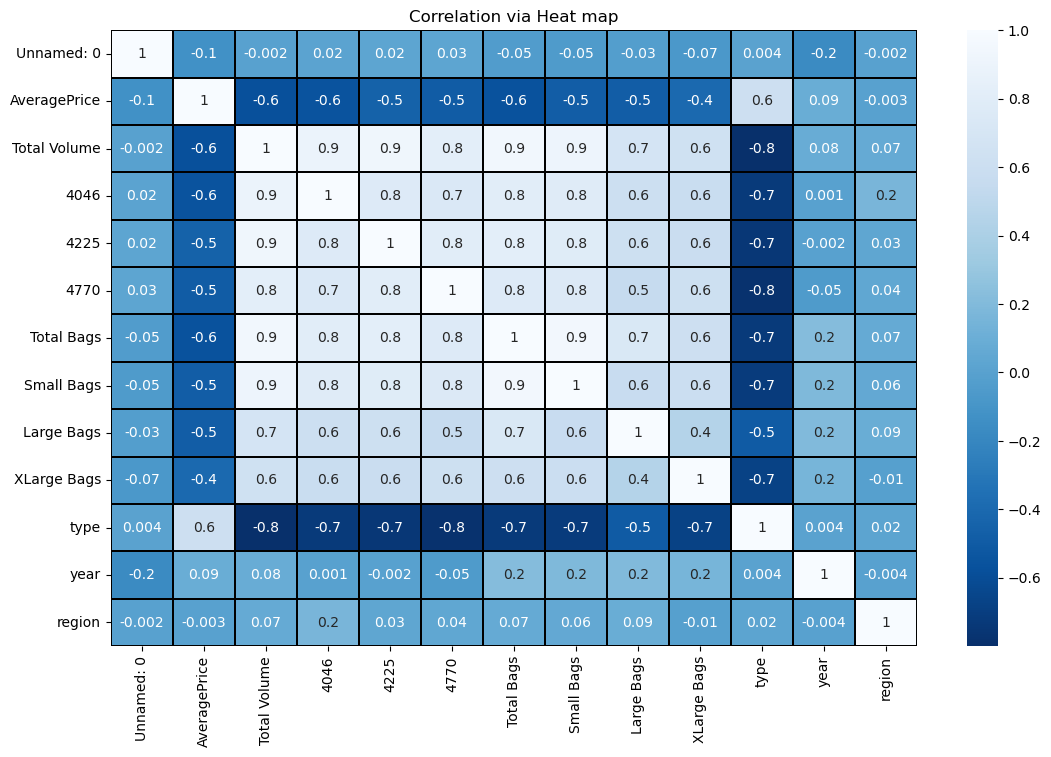

In [93]:
#Visualizing correlation via heat map
plt.figure(figsize=(13,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
1)**Features** have **very low correlation** with **target variable.**  
2)**'Unnamed: 0', 'AveragePrice', 'XLargeBags' and 'year'** features have **low negative correlation** with **target variable.**  
3)**'Total Volume', '4046', '4225', '4770', 'TotalBags', 'Small Bags', 'Large Bags' and 'type'** features have **low positive correlation** with **target variable.**  
4)These are the following **pairs with high positive correlation with each other:**  
  
**'Total Volume' and '4046'** features  
**'Total Volume' and '4225'** features  
**'Total Volume' and '4770'** features  
**'Total Volume' and 'Total Bags'** features  
**'Total Volume' and 'Small Bags'** features  
**'4046' and '4225'** features  
**'4046' and 'Total Bag's** features  
**'4046' and 'Small Bags'** features  
**'4225' and '4770'** features  
**'4225' and '4225'** features  
**'4225' and 'Small Bags'** features  
**'4770' and 'Total Bags'** features  
**'4770' and 'Small Bags'** features  
**'Total Bags' and 'Small Bags'** features  
  
These are the following **pairs with high negative correlation with each other:**  
**'Total Volume' and 'type'** features  
**'4770' and 'type'** features 

In [94]:
#Separating features and target variable 
x=df.drop('region',axis=1)
y=df['region']    

In [95]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (17651, 12) 
Dimensions of label: (17651,)


We can observe that both features and lable have **same number of rows**.  
'x' contains 12 features.

In [96]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-1.564303,-0.195352,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.692097,-1.019047,-1.210013
1,-1.499806,-0.143510,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.692097,-1.019047,-1.210013
2,-1.435310,-1.232207,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.692097,-1.019047,-1.210013
3,-1.370814,-0.843387,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.692097,-1.019047,-1.210013
4,-1.306318,-0.324959,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.692097,-1.019047,-1.210013
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.112829,0.582289,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.692097,0.981309,1.980756
17647,-1.048332,0.789660,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.692097,0.981309,1.980756
17648,-0.983836,1.204402,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.692097,0.981309,1.980756
17649,-0.919340,1.359930,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.692097,0.981309,1.980756


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [97]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.074862,Unnamed: 0
1,2.175210,AveragePrice
2,54.840677,Total Volume
3,6.910605,4046
4,12.402646,4225
5,3.951982,4770
6,35.795303,Total Bags
7,17.276727,Small Bags
8,3.475645,Large Bags
9,2.062184,XLarge Bags


**'Total Volume'** feature has **high VIF value**, thus posing **multicollinearity problem**. We can **drop 'Total Volume'** feature as it has the **highest VIF value.** 

In [98]:
x.drop('Total Volume',axis=1,inplace=True)#Dropping 'Total Volume' feature
x

,Unnamed: 0,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-1.564303,-0.195352,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.692097,-1.019047,-1.210013
1,-1.499806,-0.143510,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.692097,-1.019047,-1.210013
2,-1.435310,-1.232207,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.692097,-1.019047,-1.210013
3,-1.370814,-0.843387,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.692097,-1.019047,-1.210013
4,-1.306318,-0.324959,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.692097,-1.019047,-1.210013
...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.112829,0.582289,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.692097,0.981309,1.980756
17647,-1.048332,0.789660,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.692097,0.981309,1.980756
17648,-0.983836,1.204402,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.692097,0.981309,1.980756
17649,-0.919340,1.359930,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.692097,0.981309,1.980756


**'Total Volume'** feature is **dropped successfully.**

In [99]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.074840,Unnamed: 0
1,2.116251,AveragePrice
2,3.590610,4046
3,4.628949,4225
4,3.942034,4770
5,26.601736,Total Bags
6,17.266254,Small Bags
7,3.421803,Large Bags
8,2.051655,XLarge Bags
9,4.092271,type


**'Total Bags', and 'Small Bags'** features still have **high VIF values**, thus we can **drop 'Total Bags'** feature as it has the **highest VIF value.** 

In [100]:
x.drop('Total Bags',axis=1,inplace=True)#Dropping 'Total Bags' feature
x

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,-1.564303,-0.195352,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.692097,-1.019047,-1.210013
1,-1.499806,-0.143510,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.692097,-1.019047,-1.210013
2,-1.435310,-1.232207,-0.731776,0.649333,0.023923,-0.374453,-0.758523,-0.692097,-1.019047,-1.210013
3,-1.370814,-0.843387,-0.632592,0.468799,-0.121164,-0.510991,-0.699123,-0.692097,-1.019047,-1.210013
4,-1.306318,-0.324959,-0.684504,0.262126,-0.110491,-0.490534,-0.607027,-0.692097,-1.019047,-1.210013
...,...,...,...,...,...,...,...,...,...,...
17646,-1.112829,0.582289,-0.462066,-0.926028,-1.228986,-0.175753,-0.412401,-0.692097,0.981309,1.980756
17647,-1.048332,0.789660,-0.618019,-0.670600,-1.228986,-0.331971,-0.484991,-0.692097,0.981309,1.980756
17648,-0.983836,1.204402,-0.617966,-0.778893,0.445710,-0.313756,-0.950743,-0.692097,0.981309,1.980756
17649,-0.919340,1.359930,-0.547011,-0.716371,0.445399,-0.250408,-0.916068,-0.692097,0.981309,1.980756


In [101]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.073219,Unnamed: 0
1,1.953591,AveragePrice
2,3.584335,4046
3,4.345307,4225
4,3.941898,4770
5,4.158396,Small Bags
6,2.051850,Large Bags
7,2.051644,XLarge Bags
8,4.067275,type
9,1.364691,year


Now the multicollinearity problem is solved.

In [102]:
x.shape#checking shape of 'x'

(17651, 10)

'x' contains **10 features.**

In [103]:
y.value_counts()#checking value counts of 'y'

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

This shows that this data is imbalanced , to balance data, we can use oversampling method.

In [104]:
#oversampling the data
from imblearn.over_sampling import SMOTE #importing necessary library

sm=SMOTE()#creating instance

x1,y1=sm.fit_resample(x,y)#sampling data

In [105]:
y1.value_counts()#checking value counts of 'y1'

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

The data is balanced now.

In [106]:
#checking number of sampled data  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])#printing

#Updating features and label
x=x1
y=y1

Dimensions of features before sampling: 17651 
Dimensions of label before sampling: 17651 
Dimensions of features after sampling: 18252 
Dimensions of label after sampling: 18252 
Differnce =  601


In [107]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts,cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier

In [108]:
#Finding best random state on Random Forest Classifier
ac_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,50):#running 'if' loop for 49 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    RFR=RandomForestClassifier()#creating instance
    
    RFR.fit(x_train,y_train)#fitting data
    pr=RFR.predict(x_test)#predicting data
    
    ac=accuracy_score(y_test,pr)#calculating accuracy score 
    
    if ac>ac_updater:#using if condition to update 'ac_updater' and 'rs_updater' only if 'ac' is greater than 'ac_updater'
        #updating values
        ac_updater=ac
        rs_updater=i

print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)#printing

Max accuracy score during the iteration is  0.9260409057706355 on randome state :  4


In [109]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [110]:
#Creating instance of  various models
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity
    
for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data 
    pr=i.predict(x_test)#predicting data
    
    A_score=accuracy_score(y_test,pr)#calculating accuracy  score
    C_matrix=confusion_matrix(y_test,pr)#calculating confusion matrix
    C_report=classification_report(y_test,pr)#calculating classification report
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(A_score - score.mean())*100  #calculating difference of accuracy score and Cross Validation Score
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','\nConfusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\nClassification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between accuracy score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.4974433893352812 
 
Confusion matrix of LogisticRegression :
 [[66  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 50 ...  0  0  4]
 ...
 [ 0  0  0 ... 97  0  0]
 [ 0  0  0 ...  0 92  0]
 [ 0  6  0 ...  0  0 12]] 
Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           0       0.61      0.62      0.61       107
           1       0.23      0.42      0.30        95
           2       0.57      0.55      0.56        91
           3       0.52      0.39      0.45       112
           4       0.59      0.48      0.53       101
           5       0.54      0.33      0.41       116
           6       0.76      0.85      0.80       112
           7       0.60      0.57      0.58       108
           8       0.59      0.76      0.66        96
           9       0.49      0.80      0.61        94
          10       0.62      0.34      0.44       114
          11       0.52      0.62      0


 Accuracy score of GradientBoostingClassifier is 0.8367421475529584 
 
Confusion matrix of GradientBoostingClassifier :
 [[ 88   0   0 ...   0   0   0]
 [  0  70   0 ...   0   0   2]
 [  0   0  87 ...   0   0   0]
 ...
 [  0   0   0 ...  94   2   0]
 [  0   0   0 ...   0 104   0]
 [  0   1   1 ...   0   0  78]] 
Classification report of  GradientBoostingClassifier :
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       107
           1       0.75      0.74      0.74        95
           2       0.96      0.96      0.96        91
           3       0.77      0.76      0.77       112
           4       0.90      0.92      0.91       101
           5       0.78      0.75      0.77       116
           6       0.98      0.92      0.95       112
           7       0.85      0.80      0.82       108
           8       0.94      0.95      0.94        96
           9       0.80      0.72      0.76        94
          10       0.78      0.75 


 Accuracy score of SVC is 0.8078889700511322 
 
Confusion matrix of SVC :
 [[101   0   0 ...   0   0   0]
 [  0  59   0 ...   0   0   0]
 [  0   0  89 ...   0   0   0]
 ...
 [  0   0   0 ...  97   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   0   1 ...   0   0  74]] 
Classification report of  SVC :
               precision    recall  f1-score   support

           0       0.72      0.94      0.81       107
           1       0.55      0.62      0.58        95
           2       0.91      0.98      0.94        91
           3       0.80      0.77      0.79       112
           4       0.96      0.92      0.94       101
           5       0.98      0.70      0.81       116
           6       0.98      0.92      0.95       112
           7       0.75      0.68      0.71       108
           8       0.96      0.96      0.96        96
           9       0.74      0.84      0.79        94
          10       0.66      0.63      0.65       114
          11       0.81      0.95      0.87      

Here by comparing difference of R2 score and cross validation  of various models, **AdaBoostClassifier** has the least difference between R2 score and cross validation than the rest of the models, however it's not performing well as per observations made via metrics.  
We are selecting 2nd best model SupportVectorClassifier.

In [131]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'shrinking':[True,False],'gamma':['scale','auto'],'C':[0.1,1,10]}#defining hyper parameters

gsc=GSC(SVC,pa)#creating instance

gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters

{'C': 10, 'gamma': 'auto', 'shrinking': True}

In [132]:
#Applying best parameters provided by GridSearchCV
final=SupportVectorClassifier(C=10,gamma='auto',shrinking=True)

In [134]:
final.fit(x_train,y_train)#fitting data 
pr=final.predict(x_test)#predicting data

ac=accuracy_score(y_test,pr)
print(ac)

0.9132578524470416


Model's accuracy score is increased from 62% to 91%.

In [207]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

#creating new data frame with Predicted and Original values
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})

In [208]:
rg.rename(columns={'Origianl Value':'Original Value'},inplace=True)#renaming column of 'rg' data frame

con=pd.DataFrame(data=rg)#creating new data frame contaning data of 'rg' data frame

con.drop_duplicates(subset='Original Value',inplace=True)#dropping duplicates values based on 'Original Value' column
con.reset_index(drop=True,inplace=True)#reseting index
con

,Original Value,Encoded Value
0,Albany,0
1,Atlanta,1
2,BaltimoreWashington,2
3,Boise,3
4,Boston,4
5,BuffaloRochester,5
6,California,6
7,Charlotte,7
8,Chicago,8
9,CincinnatiDayton,9


In [209]:
for i in range(0,54):#running loop for 54 times
    
    Encoded_Value=con.loc[i,'Encoded Value']#storing encoded value present at 'i' index of 'con' data frame
    Original_Value=con.loc[i,'Original Value']#storing original value present at 'i' index of 'con' data frame
    
    conclusion.replace(Encoded_Value,Original_Value,inplace=True)#replacing encoded values with original values

In [210]:
conclusion.sample(20)

,Predicted Values,Original Values
1768,Pittsburgh,Pittsburgh
15468,Louisville,Louisville
13493,Roanoke,Roanoke
10436,Pittsburgh,Pittsburgh
1097,LasVegas,LasVegas
3087,Charlotte,Charlotte
12315,HarrisburgScranton,HarrisburgScranton
10452,GrandRapids,Pittsburgh
17894,Seattle,Seattle
5050,SouthCentral,SouthCentral


Here we can conclude that the model predicted values are close enough to the original values. 

In [211]:
#Saving the model
import joblib
joblib.dump(final,r'D:\Models\A_C.obj')

['D:\\Models\\A_C.obj']